# Exploring Leading Economic Indicators

#### Notebook Structure

1. [ISM Reports for the US Manufacturing and Services Sectors](#1.-ISM-PMI-Reports-for-the-US-Manufacturing-and-Services-Sectors)
2. [University of Michigan Consumer Sentiment](#2.-University-of-Michigan-Consumer-Sentiment)
3. [U.S. Census Bureau's Building Permits Survey](#3.-U.S.-Census-Bureau's-Building-Permits-Survey)
4. [European Economic Sentiment](#4.-European-Economic-Sentiment)
5. [Caixin Manufacturing and Services PMI](#5.-Caixin-Manufacturing-and-Services-PMI)
6. [Market Data Snapshot from Trading Economics](#6.-Market-Data-Snapshot-from-Trading-Economics)
7. [Industry and Stock-Level Data from FinViz](#7.-Industry-and-Stock-Level-Data-from-FinViz)
8. [Loading Extracted Data into SQLite Database](#8.-Loading-Extracted-Data-into-SQLite-Database)

#### Import Modules

In [1]:
from datetime import datetime

import pandas as pd
import seaborn as sns
from matplotlib import colors, ticker
from matplotlib import pyplot as plt

from lisa import (
    CaixinPmi,
    ConstructionSurvey,
    ConsumerSurvey,
    DBConnection,
    EuroSurvey,
    Finviz,
    FinvizScreener,
    IsmReport,
    MarkDownDisplay,
    TradingEconomics,
)

## 1. ISM PMI Reports for the US Manufacturing and Services Sectors

The [ISM PMI (Purchasing Managers' Index) reports](https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/) are economic indicators published monthly by the Institute for Supply Management (ISM). These reports provide insights into the health of the manufacturing and non-manufacturing (services) sectors of the U.S. economy. The reports are based on surveys of purchasing and supply executives, and a reading above 50 indicates expansion, while a reading below 50 indicates contraction.

The ISM PMI reports are closely watched by investors, economists, and policymakers as they can influence market sentiment and potentially impact investment decisions. 

#### Getting Data from the ISM Manufacturing Report

In [2]:
ism_man = IsmReport.download_manufacturing()

The following are sections of the ISM manufacturing report:

In [3]:
attributes = (', ').join(ism_man.__dict__.keys())
MarkDownDisplay(attributes)

<p style="text-align: left";>_headline, _title, _highlights, _overview, _comments, _full_pmi_table, _comm_price_up, _comm_price_down, _comm_supply_short, _index_summary, _new_orders_text, _new_orders_table, _production_text, _production_table, _employment_text, _employment_table, _supplier_deliveries_text, _supplier_deliveries_table, _inventories_text, _inventories_table, _customer_inventories_text, _customer_inventories_table, _prices_text, _prices_table, _backlog_orders_text, _backlog_orders_table, _export_orders_text, _export_orders_table, _imports_text, _imports_table, _buying_policy_text, _buying_policy_table, _sector_ranking, _respondents, _month, _year</p>

<br>The "download_manufacturing()" method gets the latest report by default. For a specific report, a URL may be passed as an argument.<br>Below are some sections from the report.

In [4]:
MarkDownDisplay(ism_man.headline, bold=True, align='center')
MarkDownDisplay(ism_man.full_pmi_table, index=True, bold=True, align='center')

<p style="text-align: center";><b>Manufacturing PMI® at 49.1%</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr>
      <th><b></b></th>
      <th><b>Series Index Sep</b></th>
      <th><b>Series Index Aug</b></th>
      <th><b>Percentage Point Change</b></th>
      <th><b>Direction</b></th>
      <th><b>Rate of Change</b></th>
      <th><b>Trend (Months)</b></th>
    </tr>
    <tr>
      <th><b>Index</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Manufacturing PMI®</b></th>
      <td>49.1</td>
      <td>48.7</td>
      <td>0.4</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>7.0</td>
    </tr>
    <tr>
      <th><b>New Orders</b></th>
      <td>48.9</td>
      <td>51.4</td>
      <td>-2.5</td>
      <td>Contracting</td>
      <td>From Growing</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th><b>Production</b></th>
      <td>51.0</td>
      <td>47.8</td>
      <td>3.2</td>
      <td>Growing</td>
      <td>From Contracting</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th><b>Employment</b></th>
      <td>45.3</td>
      <td>43.8</td>
      <td>1.5</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th><b>Supplier Deliveries</b></th>
      <td>52.6</td>
      <td>51.3</td>
      <td>1.3</td>
      <td>Slowing</td>
      <td>Faster</td>
      <td>2.0</td>
    </tr>
    <tr>
      <th><b>Inventories</b></th>
      <td>47.7</td>
      <td>49.4</td>
      <td>-1.7</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th><b>Customers’ Inventories</b></th>
      <td>43.7</td>
      <td>44.6</td>
      <td>-0.9</td>
      <td>Too Low</td>
      <td>Faster</td>
      <td>12.0</td>
    </tr>
    <tr>
      <th><b>Prices</b></th>
      <td>61.9</td>
      <td>63.7</td>
      <td>-1.8</td>
      <td>Increasing</td>
      <td>Slower</td>
      <td>12.0</td>
    </tr>
    <tr>
      <th><b>Backlog of Orders</b></th>
      <td>46.2</td>
      <td>44.7</td>
      <td>1.5</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>36.0</td>
    </tr>
    <tr>
      <th><b>New Export Orders</b></th>
      <td>43.0</td>
      <td>47.6</td>
      <td>-4.6</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>7.0</td>
    </tr>
    <tr>
      <th><b>Imports</b></th>
      <td>44.7</td>
      <td>46.0</td>
      <td>-1.3</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th><b>OVERALL ECONOMY</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Faster</td>
      <td>65.0</td>
    </tr>
    <tr>
      <th><b>Manufacturing Sector</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>7.0</td>
    </tr>
  </tbody>
</table></div>

<br>The process for obtaining the ISM services report is identical. Only the sectors names and a few sections differ between the two reports.

In [5]:
ism_serv = IsmReport.download_services()
MarkDownDisplay(ism_serv.headline, bold=True, align='center')
MarkDownDisplay(ism_serv.full_pmi_table, index=True, bold=True, align='center')

<p style="text-align: center";><b>Services PMI® at 50%</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr>
      <th><b></b></th>
      <th colspan="6" halign="left">Services PMI®</th>
      <th colspan="3" halign="left">Manufacturing PMI®</th>
    </tr>
    <tr>
      <th><b></b></th>
      <th><b>Series Index Sep</b></th>
      <th><b>Series Index Aug</b></th>
      <th><b>Percent Point Change</b></th>
      <th><b>Direction</b></th>
      <th><b>Rate of Change</b></th>
      <th><b>Trend (Months)</b></th>
      <th><b>Series Index Sep</b></th>
      <th><b>Series Index Aug</b></th>
      <th><b>Percent Point Change</b></th>
    </tr>
    <tr>
      <th><b>Index</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Services PMI®</b></th>
      <td>50.0</td>
      <td>52.0</td>
      <td>-2.0</td>
      <td>Unchanged</td>
      <td>From Growing</td>
      <td>1.0</td>
      <td>49.1</td>
      <td>48.7</td>
      <td>0.4</td>
    </tr>
    <tr>
      <th><b>Business Activity/ Production</b></th>
      <td>49.9</td>
      <td>55.0</td>
      <td>-5.1</td>
      <td>Contracting</td>
      <td>From Growing</td>
      <td>1.0</td>
      <td>51.0</td>
      <td>47.8</td>
      <td>3.2</td>
    </tr>
    <tr>
      <th><b>New Orders</b></th>
      <td>50.4</td>
      <td>56.0</td>
      <td>-5.6</td>
      <td>Growing</td>
      <td>Slower</td>
      <td>4.0</td>
      <td>48.9</td>
      <td>51.4</td>
      <td>-2.5</td>
    </tr>
    <tr>
      <th><b>Employment</b></th>
      <td>47.2</td>
      <td>46.5</td>
      <td>0.7</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>4.0</td>
      <td>45.3</td>
      <td>43.8</td>
      <td>1.5</td>
    </tr>
    <tr>
      <th><b>Supplier Deliveries</b></th>
      <td>52.6</td>
      <td>50.3</td>
      <td>2.3</td>
      <td>Slowing</td>
      <td>Faster</td>
      <td>10.0</td>
      <td>52.6</td>
      <td>51.3</td>
      <td>1.3</td>
    </tr>
    <tr>
      <th><b>Inventories</b></th>
      <td>47.8</td>
      <td>53.2</td>
      <td>-5.4</td>
      <td>Contracting</td>
      <td>From Growing</td>
      <td>1.0</td>
      <td>47.7</td>
      <td>49.4</td>
      <td>-1.7</td>
    </tr>
    <tr>
      <th><b>Prices</b></th>
      <td>69.4</td>
      <td>69.2</td>
      <td>0.2</td>
      <td>Increasing</td>
      <td>Faster</td>
      <td>100.0</td>
      <td>61.9</td>
      <td>63.7</td>
      <td>-1.8</td>
    </tr>
    <tr>
      <th><b>Backlog of Orders</b></th>
      <td>47.3</td>
      <td>40.4</td>
      <td>6.9</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>7.0</td>
      <td>46.2</td>
      <td>44.7</td>
      <td>1.5</td>
    </tr>
    <tr>
      <th><b>New Export Orders</b></th>
      <td>46.5</td>
      <td>47.3</td>
      <td>-0.8</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>3.0</td>
      <td>43.0</td>
      <td>47.6</td>
      <td>-4.6</td>
    </tr>
    <tr>
      <th><b>Imports</b></th>
      <td>49.2</td>
      <td>54.6</td>
      <td>-5.4</td>
      <td>Contracting</td>
      <td>From Growing</td>
      <td>1.0</td>
      <td>44.7</td>
      <td>46.0</td>
      <td>-1.3</td>
    </tr>
    <tr>
      <th><b>Inventory Sentiment</b></th>
      <td>55.7</td>
      <td>55.5</td>
      <td>0.2</td>
      <td>Too High</td>
      <td>Faster</td>
      <td>29.0</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th><b>Customers' Inventories</b></th>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>43.7</td>
      <td>44.6</td>
      <td>-0.9</td>
    </tr>
    <tr>
      <th><b>Overall Economy</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Slower</td>
      <td>64.0</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <th><b>Services Sector</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Unchanged</td>
      <td>From Growing</td>
      <td>1.0</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
  </tbody>
</table></div>

## 2. University of Michigan Consumer Sentiment

The [University of Michigan Consumer Sentiment Index (MCSI)](https://www.sca.isr.umich.edu/) is a monthly survey that measures how optimistic or pessimistic US consumers are about the economy. It gauges their attitudes towards personal finances, business conditions, and overall economic activity. The index is based on interviews conducted by the University of Michigan's Institute for Social Research.

Consumer spending is a major driver of the US economy, and the MCSI is considered a leading indicator of future economic activity. 

The MCSI is composed of the Index of Current Economic Conditions (which reflects current financial situations) and the Index of Consumer Expectations (which reflects future outlook). A value of greater than 80 indicates bullish sentiment, whereas below 70 indicates bearish sentiment. 

#### Getting Data from the Consumer Survey

In [6]:
consumer = ConsumerSurvey.download()
MarkDownDisplay("MCSI Current and Future Expectations", bold=True, align='center')
MarkDownDisplay(consumer.table, bold=True, align='center')

<p style="text-align: center";><b>MCSI Current and Future Expectations</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Index</b></th>
      <th><b>Current Index</b></th>
      <th><b>Expected Index</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2024</td>
      <td>10</td>
      <td>70.5</td>
      <td>64.9</td>
      <td>74.1</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>11</td>
      <td>71.8</td>
      <td>63.9</td>
      <td>76.9</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>12</td>
      <td>74.0</td>
      <td>75.1</td>
      <td>73.3</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>1</td>
      <td>71.7</td>
      <td>75.1</td>
      <td>69.5</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>2</td>
      <td>64.7</td>
      <td>65.7</td>
      <td>64.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>3</td>
      <td>57.0</td>
      <td>63.8</td>
      <td>52.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>52.2</td>
      <td>59.8</td>
      <td>47.3</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>52.2</td>
      <td>58.9</td>
      <td>47.9</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>60.7</td>
      <td>64.8</td>
      <td>58.1</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>61.7</td>
      <td>68.0</td>
      <td>57.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>8</td>
      <td>58.2</td>
      <td>61.7</td>
      <td>55.9</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>9</td>
      <td>55.1</td>
      <td>60.4</td>
      <td>51.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>10</td>
      <td>55.0</td>
      <td>61.0</td>
      <td>51.2</td>
    </tr>
  </tbody>
</table></div>

## 3. U.S. Census Bureau's Building Permits Survey

The [U.S. Census Bureau's Building Permits Survey (BPS)](https://www.census.gov/construction/nrc/current/index.html) is a monthly survey that collects data on new privately-owned residential construction. It's a key economic indicator, providing statistics on the number of housing units authorized by building permits, and the valuation of those permits, at national, state, and local levels. This data is vital for understanding the health and direction of the housing market and the broader economy. 

#### Getting Data from the Building Permits Survey

In [7]:
build = ConstructionSurvey.download()
MarkDownDisplay("US Census Bureau Construction Survey Data", bold=True, align='center')
MarkDownDisplay(build.table.tail(), bold=True, align='center')

<p style="text-align: center";><b>US Census Bureau Construction Survey Data</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Permits</b></th>
      <th><b>Authorized</b></th>
      <th><b>Starts</b></th>
      <th><b>Under Construction</b></th>
      <th><b>Completions</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>1422</td>
      <td>268</td>
      <td>1398</td>
      <td>1393</td>
      <td>1475</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>1394</td>
      <td>269</td>
      <td>1282</td>
      <td>1366</td>
      <td>1542</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>1393</td>
      <td>263</td>
      <td>1382</td>
      <td>1348</td>
      <td>1385</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>1362</td>
      <td>256</td>
      <td>1429</td>
      <td>1337</td>
      <td>1483</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>8</td>
      <td>1330</td>
      <td>252</td>
      <td>1307</td>
      <td>1317</td>
      <td>1608</td>
    </tr>
  </tbody>
</table></div>

<br>In future, plotting methods may be built-into to the ConstructionSurvey class to allow easy visualisation of trends:

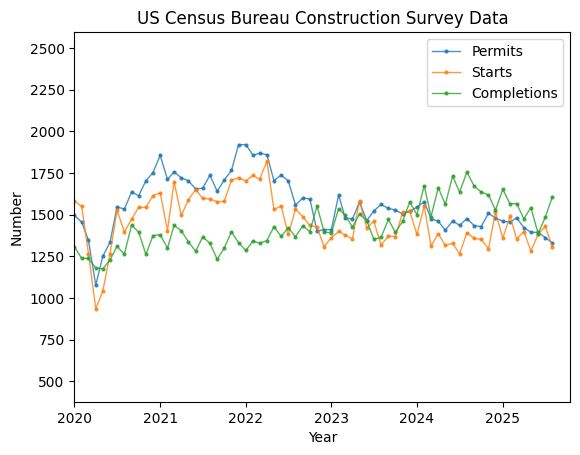

In [8]:
start_date = datetime(2020, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = build.table
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

fig, ax = plt.subplots()
ax.plot(dates, df['Permits'], label='Permits', **line_settings)
ax.plot(dates, df['Starts'], label='Starts', **line_settings)
ax.plot(dates, df['Completions'], label='Completions', **line_settings)

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title('US Census Bureau Construction Survey Data')
ax.legend()

plt.show()

## 4. European Economic Sentiment

The [European Economic Sentiment Indicator (ESI)](https://economy-finance.ec.europa.eu/economic-forecast-and-surveys/business-and-consumer-surveys_en) is a composite measure that tracks economic confidence in the EU and euro area. It's a weighted average of confidence indicators from five key sectors: industry, services, consumers, retail trade, and construction. The ESI is used to gauge overall economic sentiment and its fluctuations, with values above 100 indicating above-average sentiment and values below 100 indicating below-average sentiment. 

#### Getting Data from the European Economic Sentiment Surveys

In [9]:
euro = EuroSurvey.download()
MarkDownDisplay("EU Economic Sentiment Indicator and Components", bold=True, align='center')
MarkDownDisplay(euro.table.tail(), bold=True, align='center')

<p style="text-align: center";><b>EU Economic Sentiment Indicator and Components</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>EU.INDU</b></th>
      <th><b>EU.SERV</b></th>
      <th><b>EU.CONS</b></th>
      <th><b>EU.RETA</b></th>
      <th><b>EU.BUIL</b></th>
      <th><b>EU.ESI</b></th>
      <th><b>EU.EEI</b></th>
      <th><b>EA.INDU</b></th>
      <th><b>EA.SERV</b></th>
      <th><b>EA.CONS</b></th>
      <th><b>EA.RETA</b></th>
      <th><b>EA.BUIL</b></th>
      <th><b>EA.ESI</b></th>
      <th><b>EA.EEI</b></th>
      <th><b>BE.INDU</b></th>
      <th><b>BE.SERV</b></th>
      <th><b>BE.CONS</b></th>
      <th><b>BE.RETA</b></th>
      <th><b>BE.BUIL</b></th>
      <th><b>BE.ESI</b></th>
      <th><b>BE.EEI</b></th>
      <th><b>BG.INDU</b></th>
      <th><b>BG.SERV</b></th>
      <th><b>BG.CONS</b></th>
      <th><b>BG.RETA</b></th>
      <th><b>BG.BUIL</b></th>
      <th><b>BG.ESI</b></th>
      <th><b>BG.EEI</b></th>
      <th><b>CZ.INDU</b></th>
      <th><b>CZ.SERV</b></th>
      <th><b>CZ.CONS</b></th>
      <th><b>CZ.RETA</b></th>
      <th><b>CZ.BUIL</b></th>
      <th><b>CZ.ESI</b></th>
      <th><b>CZ.EEI</b></th>
      <th><b>DK.INDU</b></th>
      <th><b>DK.SERV</b></th>
      <th><b>DK.CONS</b></th>
      <th><b>DK.RETA</b></th>
      <th><b>DK.BUIL</b></th>
      <th><b>DK.ESI</b></th>
      <th><b>DK.EEI</b></th>
      <th><b>DE.INDU</b></th>
      <th><b>DE.SERV</b></th>
      <th><b>DE.CONS</b></th>
      <th><b>DE.RETA</b></th>
      <th><b>DE.BUIL</b></th>
      <th><b>DE.ESI</b></th>
      <th><b>DE.EEI</b></th>
      <th><b>EE.INDU</b></th>
      <th><b>EE.SERV</b></th>
      <th><b>EE.CONS</b></th>
      <th><b>EE.RETA</b></th>
      <th><b>EE.BUIL</b></th>
      <th><b>EE.ESI</b></th>
      <th><b>EE.EEI</b></th>
      <th><b>IE.INDU</b></th>
      <th><b>IE.SERV</b></th>
      <th><b>IE.CONS</b></th>
      <th><b>IE.RETA</b></th>
      <th><b>IE.BUIL</b></th>
      <th><b>IE.ESI</b></th>
      <th><b>IE.EEI</b></th>
      <th><b>EL.INDU</b></th>
      <th><b>EL.SERV</b></th>
      <th><b>EL.CONS</b></th>
      <th><b>EL.RETA</b></th>
      <th><b>EL.BUIL</b></th>
      <th><b>EL.ESI</b></th>
      <th><b>EL.EEI</b></th>
      <th><b>ES.INDU</b></th>
      <th><b>ES.SERV</b></th>
      <th><b>ES.CONS</b></th>
      <th><b>ES.RETA</b></th>
      <th><b>ES.BUIL</b></th>
      <th><b>ES.ESI</b></th>
      <th><b>ES.EEI</b></th>
      <th><b>FR.INDU</b></th>
      <th><b>FR.SERV</b></th>
      <th><b>FR.CONS</b></th>
      <th><b>FR.RETA</b></th>
      <th><b>FR.BUIL</b></th>
      <th><b>FR.ESI</b></th>
      <th><b>FR.EEI</b></th>
      <th><b>HR.INDU</b></th>
      <th><b>HR.SERV</b></th>
      <th><b>HR.CONS</b></th>
      <th><b>HR.RETA</b></th>
      <th><b>HR.BUIL</b></th>
      <th><b>HR.ESI</b></th>
      <th><b>HR.EEI</b></th>
      <th><b>IT.INDU</b></th>
      <th><b>IT.SERV</b></th>
      <th><b>IT.CONS</b></th>
      <th><b>IT.RETA</b></th>
      <th><b>IT.BUIL</b></th>
      <th><b>IT.ESI</b></th>
      <th><b>IT.EEI</b></th>
      <th><b>CY.INDU</b></th>
      <th><b>CY.SERV</b></th>
      <th><b>CY.CONS</b></th>
      <th><b>CY.RETA</b></th>
      <th><b>CY.BUIL</b></th>
      <th><b>CY.ESI</b></th>
      <th><b>CY.EEI</b></th>
      <th><b>LV.INDU</b></th>
      <th><b>LV.SERV</b></th>
      <th><b>LV.CONS</b></th>
      <th><b>LV.RETA</b></th>
      <th><b>LV.BUIL</b></th>
      <th><b>LV.ESI</b></th>
      <th><b>LV.EEI</b></th>
      <th><b>LT.INDU</b></th>
      <th><b>LT.SERV</b></th>
      <th><b>LT.CONS</b></th>
      <th><b>LT.RETA</b></th>
      <th><b>LT.BUIL</b></th>
      <th><b>LT.ESI</b></th>
      <th><b>LT.EEI</b></th>
      <th><b>LU.INDU</b></th>
      <th><b>LU.SERV</b></th>
      <th><b>LU.CONS</b></th>
      <th><b>LU.RETA</b></th>
      <th><b>LU.BUIL</b></th>
      <th><b>LU.ESI</b></th>
      <th><b>LU.EEI</b></th>
      <th><b>HU.INDU</b></th>
      <th><b>HU.SERV</b></th>
      <th><b>HU.CONS</b></th>
      <th><b>HU.RETA</b></th>
      <th><b>HU.BUIL</b></th>
      <th><b>HU.ESI</b></th>
      <th><b>HU.EEI</b></th>
      <th><b>MT.INDU</b></th>
      <th><b>MT.SERV</b></th>
      <th><b>MT.CONS</b></th>
      <th><b>MT.RETA</b></th>
      <th><b>MT.BUIL</b></th>
      <th><b>MT.ESI</b></th>
      <th><b>MT.EEI</b></th>
      <th><b>NL.INDU</b></th>
      <th><b>NL.SERV</b></th>
      <th><b>NL.CONS</b></th>
      <th><b>NL.RETA</b></th>
      <th><b>NL.BUIL</b></th>
      <th><b>NL.ESI</b></th>
      <th><b>NL.EEI</b></th>
      <th><b>AT.INDU</b></th>
      <th><b>AT.SERV</b></th>
      <th><b>AT.CONS</b></th>
      <th><b>AT.RETA</b></th>
      <th><b>AT.BUIL</b></th>
      <th><b>AT.ESI</b></th>
      <th><b>AT.EEI</b></th>
      <th><b>PL.INDU</b></th>
      <th><b>PL.SERV</b></th>
      <th><b>PL.CONS</b></th>
      <th><b>PL.RETA</b></th>
      <th><b>PL.BUIL</b></th>
      <th><b>PL.ESI</b></th>
      <th><b>PL.EEI</b></th>
      <th><b>PT.INDU</b></th>
      <th><b>PT.SERV</b></th>
      <th><b>PT.CONS</b></th>
      <th><b>PT.RETA</b></th>
      <th><b>PT.BUIL</b></th>
      <th><b>PT.ESI</b></th>
      <th><b>PT.EEI</b></th>
      <th><b>RO.INDU</b></th>
      <th><b>RO.SERV</b></th>
      <th><b>RO.CONS</b></th>
      <th><b>RO.RETA</b></th>
      <th><b>RO.BUIL</b></th>
      <th><b>RO.ESI</b></th>
      <th><b>RO.EEI</b></th>
      <th><b>SI.INDU</b></th>
      <th><b>SI.SERV</b></th>
      <th><b>SI.CONS</b></th>
      <th><b>SI.RETA</b></th>
      <th><b>SI.BUIL</b></th>
      <th><b>SI.ESI</b></th>
      <th><b>SI.EEI</b></th>
      <th><b>SK.INDU</b></th>
      <th><b>SK.SERV</b></th>
      <th><b>SK.CONS</b></th>
      <th><b>SK.RETA</b></th>
      <th><b>SK.BUIL</b></th>
      <th><b>SK.ESI</b></th>
      <th><b>SK.EEI</b></th>
      <th><b>FI.INDU</b></th>
      <th><b>FI.SERV</b></th>
      <th><b>FI.CONS</b></th>
      <th><b>FI.RETA</b></th>
      <th><b>FI.BUIL</b></th>
      <th><b>FI.ESI</b></th>
      <th><b>FI.EEI</b></th>
      <th><b>SE.INDU</b></th>
      <th><b>SE.SERV</b></th>
      <th><b>SE.CONS</b></th>
      <th><b>SE.RETA</b></th>
      <th><b>SE.BUIL</b></th>
      <th><b>SE.ESI</b></th>
      <th><b>SE.EEI</b></th>
      <th><b>UK.INDU</b></th>
      <th><b>UK.SERV</b></th>
      <th><b>UK.CONS</b></th>
      <th><b>UK.RETA</b></th>
      <th><b>UK.BUIL</b></th>
      <th><b>UK.ESI</b></th>
      <th><b>UK.EEI</b></th>
      <th><b>ME.INDU</b></th>
      <th><b>ME.SERV</b></th>
      <th><b>ME.CONS</b></th>
      <th><b>ME.RETA</b></th>
      <th><b>ME.BUIL</b></th>
      <th><b>ME.ESI</b></th>
      <th><b>ME.EEI</b></th>
      <th><b>MK.INDU</b></th>
      <th><b>MK.SERV</b></th>
      <th><b>MK.CONS</b></th>
      <th><b>MK.RETA</b></th>
      <th><b>MK.BUIL</b></th>
      <th><b>MK.ESI</b></th>
      <th><b>MK.EEI</b></th>
      <th><b>AL.INDU</b></th>
      <th><b>AL.SERV</b></th>
      <th><b>AL.CONS</b></th>
      <th><b>AL.RETA</b></th>
      <th><b>AL.BUIL</b></th>
      <th><b>AL.ESI</b></th>
      <th><b>AL.EEI</b></th>
      <th><b>RS.INDU</b></th>
      <th><b>RS.SERV</b></th>
      <th><b>RS.CONS</b></th>
      <th><b>RS.RETA</b></th>
      <th><b>RS.BUIL</b></th>
      <th><b>RS.ESI</b></th>
      <th><b>RS.EEI</b></th>
      <th><b>TR.INDU</b></th>
      <th><b>TR.SERV</b></th>
      <th><b>TR.CONS</b></th>
      <th><b>TR.RETA</b></th>
      <th><b>TR.BUIL</b></th>
      <th><b>TR.ESI</b></th>
      <th><b>TR.EEI</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>-10.2</td>
      <td>2.9</td>
      <td>-14.5</td>
      <td>-5.7</td>
      <td>-5.3</td>
      <td>95.2</td>
      <td>97.5</td>
      <td>-10.3</td>
      <td>2.0</td>
      <td>-15.1</td>
      <td>-7.1</td>
      <td>-3.4</td>
      <td>95.0</td>
      <td>97.1</td>
      <td>-11.1</td>
      <td>-0.3</td>
      <td>-14.3</td>
      <td>-0.4</td>
      <td>-8.4</td>
      <td>95.7</td>
      <td>91.7</td>
      <td>0.5</td>
      <td>8.4</td>
      <td>-19.6</td>
      <td>14.7</td>
      <td>-2.4</td>
      <td>103.4</td>
      <td>110.1</td>
      <td>-4.5</td>
      <td>37.9</td>
      <td>-9.3</td>
      <td>16.6</td>
      <td>-3.5</td>
      <td>102.1</td>
      <td>99.9</td>
      <td>-8.9</td>
      <td>5.8</td>
      <td>-14.4</td>
      <td>1.7</td>
      <td>-10.8</td>
      <td>92.8</td>
      <td>104.0</td>
      <td>-17.7</td>
      <td>1.6</td>
      <td>-8.7</td>
      <td>-19.9</td>
      <td>-16.3</td>
      <td>91.5</td>
      <td>94.0</td>
      <td>-10.9</td>
      <td>-5.6</td>
      <td>-35.8</td>
      <td>-15.0</td>
      <td>-18.4</td>
      <td>88.2</td>
      <td>88.9</td>
      <td>10.4</td>
      <td>18.6</td>
      <td>-16.9</td>
      <td>2.9</td>
      <td>22.6</td>
      <td>98.3</td>
      <td>97.1</td>
      <td>5.1</td>
      <td>28.6</td>
      <td>-42.7</td>
      <td>-2.1</td>
      <td>16.4</td>
      <td>106.9</td>
      <td>116.5</td>
      <td>-5.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>18.1</td>
      <td>103.4</td>
      <td>107.0</td>
      <td>-10.4</td>
      <td>-6.0</td>
      <td>-17.6</td>
      <td>-13.4</td>
      <td>-12.1</td>
      <td>93.2</td>
      <td>91.0</td>
      <td>2.3</td>
      <td>16.6</td>
      <td>-14.0</td>
      <td>0.5</td>
      <td>17.1</td>
      <td>104.1</td>
      <td>109.4</td>
      <td>-8.2</td>
      <td>1.7</td>
      <td>-16.2</td>
      <td>9.7</td>
      <td>2.3</td>
      <td>98.6</td>
      <td>104.3</td>
      <td>1.0</td>
      <td>14.9</td>
      <td>-15.8</td>
      <td>3.3</td>
      <td>5.3</td>
      <td>106.1</td>
      <td>110.1</td>
      <td>-3.8</td>
      <td>1.6</td>
      <td>-15.5</td>
      <td>1.3</td>
      <td>-7.8</td>
      <td>98.6</td>
      <td>101.2</td>
      <td>-8.3</td>
      <td>5.4</td>
      <td>0.4</td>
      <td>3.3</td>
      <td>-9.6</td>
      <td>101.3</td>
      <td>103.4</td>
      <td>-6.6</td>
      <td>&lt;NA&gt;</td>
      <td>-6.9</td>
      <td>&lt;NA&gt;</td>
      <td>-24.5</td>
      <td>104.4</td>
      <td>&lt;NA&gt;</td>
      <td>-13.6</td>
      <td>-15.2</td>
      <td>-28.0</td>
      <td>-24.5</td>
      <td>-27.6</td>
      <td>91.6</td>
      <td>97.7</td>
      <td>-17.0</td>
      <td>21.4</td>
      <td>-0.3</td>
      <td>9.7</td>
      <td>16.8</td>
      <td>97.8</td>
      <td>102.2</td>
      <td>-3.4</td>
      <td>3.8</td>
      <td>-17.6</td>
      <td>0.6</td>
      <td>16.7</td>
      <td>97.0</td>
      <td>101.9</td>
      <td>-13.4</td>
      <td>6.8</td>
      <td>-18.5</td>
      <td>-5.1</td>
      <td>-19.3</td>
      <td>91.6</td>
      <td>90.5</td>
      <td>-16.0</td>
      <td>-4.1</td>
      <td>1.8</td>
      <td>-2.2</td>
      <td>-17.9</td>
      <td>100.4</td>
      <td>102.4</td>
      <td>-4.5</td>
      <td>12.0</td>
      <td>-15.8</td>
      <td>1.9</td>
      <td>4.0</td>
      <td>105.9</td>
      <td>105.4</td>
      <td>-2.0</td>
      <td>3.2</td>
      <td>-15.9</td>
      <td>-1.0</td>
      <td>-9.0</td>
      <td>99.0</td>
      <td>105.2</td>
      <td>-8.0</td>
      <td>17.1</td>
      <td>-24.7</td>
      <td>8.8</td>
      <td>6.1</td>
      <td>98.4</td>
      <td>104.5</td>
      <td>-5.8</td>
      <td>-3.0</td>
      <td>-22.2</td>
      <td>7.1</td>
      <td>-9.3</td>
      <td>91.3</td>
      <td>107.5</td>
      <td>-8.3</td>
      <td>2.9</td>
      <td>-8.2</td>
      <td>10.5</td>
      <td>-30.6</td>
      <td>93.0</td>
      <td>97.4</td>
      <td>-2.0</td>
      <td>14.1</td>
      <td>-10.4</td>
      <td>18.2</td>
      <td>-10.2</td>
      <td>95.1</td>
      <td>99.9</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.4</td>
      <td>8.8</td>
      <td>-2.0</td>
      <td>9.6</td>
      <td>11.4</td>
      <td>104.2</td>
      <td>114.5</td>
      <td>-9.5</td>
      <td>14.2</td>
      <td>-2.6</td>
      <td>5.4</td>
      <td>-6.8</td>
      <td>100.1</td>
      <td>111.7</td>
      <td>4.6</td>
      <td>29.8</td>
      <td>-10.6</td>
      <td>13.6</td>
      <td>-3.8</td>
      <td>107.7</td>
      <td>118.7</td>
      <td>-2.9</td>
      <td>-4.4</td>
      <td>-4.8</td>
      <td>10.0</td>
      <td>-5.5</td>
      <td>90.6</td>
      <td>97.7</td>
      <td>-2.5</td>
      <td>18.6</td>
      <td>-15.5</td>
      <td>12.0</td>
      <td>-11.6</td>
      <td>96.3</td>
      <td>93.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>-11.3</td>
      <td>3.2</td>
      <td>-14.8</td>
      <td>-6.3</td>
      <td>-4.7</td>
      <td>94.2</td>
      <td>97.7</td>
      <td>-11.8</td>
      <td>3.1</td>
      <td>-15.3</td>
      <td>-7.6</td>
      <td>-3.0</td>
      <td>94.2</td>
      <td>97.2</td>
      <td>-9.3</td>
      <td>3.4</td>
      <td>-12.7</td>
      <td>-7.8</td>
      <td>-7.6</td>
      <td>97.6</td>
      <td>94.8</td>
      <td>-0.3</td>
      <td>11.2</td>
      <td>-20.0</td>
      <td>16.3</td>
      <td>2.5</td>
      <td>104.0</td>
      <td>113.3</td>
      <td>-7.5</td>
      <td>36.5</td>
      <td>-8.9</td>
      <td>9.7</td>
      <td>1.0</td>
      <td>99.1</td>
      <td>100.5</td>
      <td>-11.3</td>
      <td>6.4</td>
      <td>-13.4</td>
      <td>0.2</td>
      <td>-9.5</td>
      <td>92.6</td>
      <td>102.5</td>
      <td>-20.8</td>
      <td>3.5</td>
      <td>-8.8</td>
      <td>-21.5</td>
      <td>-14.0</td>
      <td>90.6</td>
      <td>91.2</td>
      <td>-12.3</td>
      <td>-9.6</td>
      <td>-35.3</td>
      <td>-13.9</td>
      <td>-18.3</td>
      <td>87.5</td>
      <td>90.0</td>
      <td>9.9</td>
      <td>18.3</td>
      <td>-13.4</td>
      <td>2.1</td>
      <td>18.3</td>
      <td>98.7</td>
      <td>92.2</td>
      <td>3.2</td>
      <td>28.3</td>
      <td>-46.9</td>
      <td>13.3</td>
      <td>22.1</td>
      <td>106.0</td>
      <td>113.5</td>
      <td>-6.2</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>16.6</td>
      <td>102.1</td>
      <td>109.0</td>
      <td>-12.5</td>
      <td>-6.9</td>
      <td>-17.5</td>
      <td>-14.7</td>
      <td>-12.2</td>
      <td>90.0</td>
      <td>92.9</td>
      <td>1.6</td>
      <td>14.2</td>
      <td>-11.9</td>
      <td>-4.5</td>
      <td>13.3</td>
      <td>104.4</td>
      <td>98.5</td>
      <td>-7.5</td>
      <td>2.4</td>
      <td>-17.3</td>
      <td>8.7</td>
      <td>3.5</td>
      <td>98.9</td>
      <td>107.4</td>
      <td>-0.4</td>
      <td>14.0</td>
      <td>-14.8</td>
      <td>-2.2</td>
      <td>7.8</td>
      <td>104.6</td>
      <td>106.9</td>
      <td>-3.6</td>
      <td>1.0</td>
      <td>-11.1</td>
      <td>0.9</td>
      <td>-8.4</td>
      <td>99.2</td>
      <td>100.0</td>
      <td>-8.4</td>
      <td>7.4</td>
      <td>0.3</td>
      <td>1.7</td>
      <td>-10.7</td>
      <td>101.6</td>
      <td>102.3</td>
      <td>-16.3</td>
      <td>&lt;NA&gt;</td>
      <td>-11.9</td>
      <td>&lt;NA&gt;</td>
      <td>-21.5</td>
      <td>96.2</td>
      <td>&lt;NA&gt;</td>
      <td>-11.0</td>
      <td>-17.4</td>
      <td>-29.5</td>
      <td>-23.4</td>
      <td>-30.9</td>
      <td>93.2</td>
      <td>96.8</td>
      <td>8.6</td>
      <td>6.9</td>
      <td>-0.3</td>
      <td>9.2</td>
      <td>46.5</td>
      <td>106.9</td>
      <td>108.8</td>
      <td>-4.3</td>
      <td>5.0</td>
      <td>-16.0</td>
      <td>2.6</td>
      <td>17.5</td>
      <td>97.2</td>
      <td>104.9</td>
      <td>-15.8</td>
      <td>5.0</td>
      <td>-18.4</td>
      <td>-3.1</td>
      <td>-18.8</td>
      <td>90.4</td>
      <td>92.4</td>
      <td>-15.5</td>
      <td>-3.4</td>
      <td>2.8</td>
      <td>-1.9</td>
      <td>-18.6</td>
      <td>101.3</td>
      <td>103.1</td>
      <td>-3.2</td>
      <td>14.2</td>
      <td>-16.0</td>
      <td>2.9</td>
      <td>4.9</td>
      <td>107.4</td>
      <td>106.5</td>
      <td>-1.5</td>
      <td>3.3</td>
      <td>-25.2</td>
      <td>-1.9</td>
      <td>-9.4</td>
      <td>96.7</td>
      <td>103.8</td>
      <td>-9.9</td>
      <td>15.4</td>
      <td>-25.7</td>
      <td>-2.0</td>
      <td>3.9</td>
      <td>95.7</td>
      <td>104.4</td>
      <td>-6.7</td>
      <td>-0.2</td>
      <td>-21.3</td>
      <td>8.4</td>
      <td>-2.2</td>
      <td>93.0</td>
      <td>107.5</td>
      <td>-7.8</td>
      <td>5.4</td>
      <td>-8.2</td>
      <td>3.6</td>
      <td>-32.0</td>
      <td>94.2</td>
      <td>95.2</td>
      <td>-3.2</td>
      <td>11.7</td>
      <td>-8.0</td>
      <td>13.1</td>
      <td>-11.7</td>
      <td>94.4</td>
      <td>99.4</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>6.1</td>
      <td>9.3</td>
      <td>-0.8</td>
      <td>7.1</td>
      <td>6.2</td>
      <td>106.9</td>
      <td>108.7</td>
      <td>-10.5</td>
      <td>13.2</td>
      <td>0.0</td>
      <td>10.6</td>
      <td>-9.9</td>
      <td>98.3</td>
      <td>113.9</td>
      <td>3.6</td>
      <td>25.2</td>
      <td>-10.2</td>
      <td>10.7</td>
      <td>-4.0</td>
      <td>104.9</td>
      <td>109.4</td>
      <td>-5.7</td>
      <td>-4.8</td>
      <td>-3.2</td>
      <td>8.6</td>
      <td>-6.3</td>
      <td>88.1</td>
      <td>92.5</td>
      <td>-2.1</td>
      <td>19.6</td>
      <td>-15.2</td>
      <td>9.5</td>
      <td>-13.1</td>
      <td>96.9</td>
      <td>92.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>-10.5</td>
      <td>4.0</td>
      <td>-14.5</td>
      <td>-5.5</td>
      <td>-5.4</td>
      <td>95.2</td>
      <td>97.4</td>
      <td>-10.4</td>
      <td>4.1</td>
      <td>-14.7</td>
      <td>-6.6</td>
      <td>-3.2</td>
      <td>95.8</td>
      <td>97.4</td>
      <td>-13.7</td>
      <td>2.9</td>
      <td>-12.0</td>
      <td>-3.4</td>
      <td>-7.1</td>
      <td>95.3</td>
      <td>94.8</td>
      <td>-1.5</td>
      <td>11.1</td>
      <td>-19.8</td>
      <td>13.7</td>
      <td>5.1</td>
      <td>103.2</td>
      <td>109.8</td>
      <td>-9.6</td>
      <td>33.2</td>
      <td>-6.0</td>
      <td>14.5</td>
      <td>0.4</td>
      <td>97.3</td>
      <td>97.2</td>
      <td>-14.4</td>
      <td>7.8</td>
      <td>-12.8</td>
      <td>-1.0</td>
      <td>-11.7</td>
      <td>90.9</td>
      <td>103.9</td>
      <td>-18.3</td>
      <td>3.5</td>
      <td>-8.4</td>
      <td>-23.1</td>
      <td>-13.3</td>
      <td>91.7</td>
      <td>92.1</td>
      <td>-10.8</td>
      <td>-5.3</td>
      <td>-38.5</td>
      <td>-12.2</td>
      <td>-10.3</td>
      <td>88.2</td>
      <td>93.0</td>
      <td>5.9</td>
      <td>26.3</td>
      <td>-17.7</td>
      <td>11.8</td>
      <td>23.2</td>
      <td>100.0</td>
      <td>89.3</td>
      <td>9.6</td>
      <td>29.1</td>
      <td>-47.6</td>
      <td>0.6</td>
      <td>18.4</td>
      <td>108.9</td>
      <td>115.4</td>
      <td>-4.5</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>18.3</td>
      <td>104.3</td>
      <td>109.1</td>
      <td>-11.7</td>
      <td>-4.2</td>
      <td>-16.9</td>
      <td>-11.2</td>
      <td>-14.3</td>
      <td>92.2</td>
      <td>92.9</td>
      <td>2.2</td>
      <td>6.3</td>
      <td>-12.1</td>
      <td>4.1</td>
      <td>16.2</td>
      <td>103.2</td>
      <td>105.7</td>
      <td>-7.1</td>
      <td>0.8</td>
      <td>-17.0</td>
      <td>11.9</td>
      <td>3.5</td>
      <td>99.3</td>
      <td>105.4</td>
      <td>2.0</td>
      <td>18.4</td>
      <td>-19.1</td>
      <td>0.6</td>
      <td>13.7</td>
      <td>106.4</td>
      <td>109.8</td>
      <td>-3.2</td>
      <td>0.1</td>
      <td>-9.3</td>
      <td>1.8</td>
      <td>-8.9</td>
      <td>99.6</td>
      <td>98.2</td>
      <td>-7.5</td>
      <td>4.7</td>
      <td>-0.1</td>
      <td>1.3</td>
      <td>-12.8</td>
      <td>101.5</td>
      <td>102.6</td>
      <td>-14.5</td>
      <td>&lt;NA&gt;</td>
      <td>-9.4</td>
      <td>&lt;NA&gt;</td>
      <td>-22.5</td>
      <td>98.9</td>
      <td>&lt;NA&gt;</td>
      <td>-14.5</td>
      <td>-16.7</td>
      <td>-29.0</td>
      <td>-23.7</td>
      <td>-29.8</td>
      <td>89.8</td>
      <td>94.4</td>
      <td>-5.8</td>
      <td>2.3</td>
      <td>2.9</td>
      <td>-7.0</td>
      <td>-4.0</td>
      <td>97.5</td>
      <td>97.9</td>
      <td>-4.7</td>
      <td>5.6</td>
      <td>-14.1</td>
      <td>1.5</td>
      <td>18.9</td>
      <td>97.1</td>
      <td>102.2</td>
      <td>-14.6</td>
      <td>9.5</td>
      <td>-17.0</td>
      <td>-1.3</td>
      <td>-16.4</td>
      <td>92.5</td>
      <td>96.0</td>
      <td>-16.0</td>
      <td>-3.6</td>
      <td>-2.5</td>
      <td>-2.4</td>
      <td>-17.7</td>
      <td>99.4</td>
      <td>102.4</td>
      <td>-3.1</td>
      <td>11.6</td>
      <td>-14.9</td>
      <td>3.8</td>
      <td>3.3</td>
      <td>106.6</td>
      <td>107.4</td>
      <td>-1.8</td>
      <td>2.2</td>
      <td>-31.5</td>
      <td>-5.7</td>
      <td>-9.8</td>
      <td>94.6</td>
      <td>100.1</td>
      <td>-6.9</td>
      <td>15.1</td>
      <td>-28.0</td>
      <td>3.7</td>
      <td>6.2</td>
      <td>96.9</td>
      <td>102.9</td>
      <td>-2.6</td>
      <td>0.3</td>
      <td>-19.8</td>
      <td>9.9</td>
      <td>-6.0</td>
      <td>95.1</td>
      <td>104.4</td>
      <td>-4.3</td>
      <td>4.3</td>
      <td>-6.6</td>
      <td>0.7</td>
      <td>-36.1</td>
      <td>95.7</td>
      <td>96.3</td>
      <td>-6.9</td>
      <td>18.3</td>
      <td>-5.7</td>
      <td>17.6</td>
      <td>-19.1</td>
      <td>95.0</td>
      <td>97.4</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>6.3</td>
      <td>10.8</td>
      <td>-4.2</td>
      <td>5.9</td>
      <td>4.9</td>
      <td>105.0</td>
      <td>110.2</td>
      <td>-9.3</td>
      <td>10.6</td>
      <td>1.0</td>
      <td>12.5</td>
      <td>-6.1</td>
      <td>99.8</td>
      <td>115.1</td>
      <td>3.9</td>
      <td>30.5</td>
      <td>-11.0</td>
      <td>10.2</td>
      <td>-5.5</td>
      <td>104.4</td>
      <td>119.3</td>
      <td>-5.3</td>
      <td>-3.8</td>
      <td>-6.3</td>
      <td>10.4</td>
      <td>-7.4</td>
      <td>87.9</td>
      <td>97.2</td>
      <td>-1.7</td>
      <td>18.7</td>
      <td>-17.2</td>
      <td>10.1</td>
      <td>-11.4</td>
      <td>96.4</td>
      <td>92.8</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>8</td>
      <td>-10.6</td>
      <td>3.8</td>
      <td>-14.8</td>
      <td>-5.1</td>
      <td>-5.7</td>
      <td>94.9</td>
      <td>98.0</td>
      <td>-10.2</td>
      <td>3.8</td>
      <td>-15.5</td>
      <td>-6.4</td>
      <td>-3.6</td>
      <td>95.3</td>
      <td>97.7</td>
      <td>-11.3</td>
      <td>-2.3</td>
      <td>-12.6</td>
      <td>-5.2</td>
      <td>-9.0</td>
      <td>94.8</td>
      <td>92.0</td>
      <td>-1.1</td>
      <td>12.4</td>
      <td>-21.4</td>
      <td>11.3</td>
      <td>5.7</td>
      <td>103.4</td>
      <td>112.1</td>
      <td>-5.4</td>
      <td>39.8</td>
      <td>-9.4</td>
      <td>12.6</td>
      <td>2.0</td>
      <td>102.5</td>
      <td>99.7</td>
      <td>-14.6</td>
      <td>7.1</td>
      <td>-14.1</td>
      <td>-2.6</td>
      <td>-10.2</td>
      <td>89.7</td>
      <td>105.1</td>
      <td>-19.5</td>
      <td>4.0</td>
      <td>-10.6</td>
      <td>-21.9</td>
      <td>-13.2</td>
      <td>90.7</td>
      <td>92.8</td>
      <td>-12.1</td>
      <td>-0.9</td>
      <td>-36.8</td>
      <td>-15.6</td>
      <td>-13.0</td>
      <td>88.7</td>
      <td>95.1</td>
      <td>9.7</td>
      <td>15.8</td>
      <td>-16.3</td>
      <td>9.6</td>
      <td>12.7</td>
      <td>97.1</td>
      <td>86.1</td>
      <td>10.9</td>
      <td>29.9</td>
      <td>-48.8</td>
      <td>-2.5</td>
      <td>25.9</td>
      <td>110.0</td>
      <td>114.4</td>
      <td>-5.8</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>8.7</td>
      <td>101.7</td>
      <td>106.1</td>
      <td>-10.4</td>
      <td>-6.0</td>
      <td>-18.6</td>
      <td>-10.1</td>
      <td>-13.8</td>
      <td>92.7</td>
      <td>93.6</td>
      <td>-0.2</td>
      <td>20.2</td>
      <td>-12.3</td>
      <td>3.8</td>
      <td>13.3</td>
      <td>105.1</td>
      <td>105.1</td>
      <td>-7.7</td>
      <td>2.3</td>
      <td>-16.8</td>
      <td>9.1</td>
      <td>1.0</td>
      <td>98.3</td>
      <td>104.5</td>
      <td>2.9</td>
      <td>8.6</td>
      <td>-13.3</td>
      <td>6.2</td>
      <td>8.5</td>
      <td>105.5</td>
      <td>103.9</td>
      <td>-5.0</td>
      <td>0.4</td>
      <td>-14.6</td>
      <td>3.3</td>
      <td>-9.3</td>
      <td>97.3</td>
      <td>98.2</td>
      <td>-7.3</td>
      <td>9.6</td>
      <td>1.7</td>
      <td>2.6</td>
      <td>-14.5</td>
      <td>103.3</td>
      <td>102.1</td>
      <td>-28.6</td>
      <td>&lt;NA&gt;</td>
      <td>-9.0</td>
      <td>&lt;NA&gt;</td>
      <td>-19.1</td>
      <td>93.8</td>
      <td>&lt;NA&gt;</td>
      <td>-11.3</td>
      <td>-18.1</td>
      <td>-27.0</td>
      <td>-20.9</td>
      <td>-26.7</td>
      <td>91.7</td>
      <td>97.4</td>
      <td>-6.0</td>
      <td>27.1</td>
      <td>1.9</td>
      <td>4.5</td>
      <td>-10.4</td>
      <td>103.7</td>
      <td>97.0</td>
      <td>-2.5</td>
      <td>6.7</td>
      <td>-14.6</td>
      <td>7.1</td>
      <td>17.2</td>
      <td>100.6</td>
      <td>102.4</td>
      <td>-15.5</td>
      <td>5.6</td>
      <td>-14.1</td>
      <td>-3.7</td>
      <td>-17.9</td>
      <td>93.0</td>
      <td>95.4</td>
      <td>-16.6</td>
      <td>-2.9</td>
      <td>1.3</td>
      <td>-2.6</td>
      <td>-18.3</td>
      <td>99.9</td>
      <td>101.9</td>
      <td>-3.1</td>
      <td>12.9</td>
      <td>-17.2</td>
      <td>3.5</td>
      <td>2.6</td>
      <td>107.0</td>
      <td>104.7</td>
      <td>-1.8</td>
      <td>0.7</td>
      <td>-31.5</td>
      <td>-2.6</td>
      <td>-10.0</td>
      <td>94.4</td>
      <td>99.8</td>
      <td>-5.6</td>
      <td>16.1</td>
      <td>-27.0</td>
      <td>-2.8</td>
      <td>3.8</td>
      <td>98.5</td>
      <td>104.6</td>
      <td>4.3</td>
      <td>2.4</td>
      <td>-20.4</td>
      <td>8.3</td>
      <td>-6.7</td>
      <td>98.4</td>
      <td>107.9</td>
      <td>-1.7</td>
      <td>6.3</td>
      <td>-7.8</td>
      <td>2.3</td>
      <td>-26.3</td>
      <td>97.2</td>
      <td>97.5</td>
      <td>-3.8</td>
      <td>17.1</td>
      <td>-6.5</td>
      <td>19.9</td>
      <td>-12.3</td>
      <td>96.5</td>
      <td>99.1</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>7.8</td>
      <td>10.2</td>
      <td>-6.2</td>
      <td>2.8</td>
      <td>2.5</td>
      <td>106.1</td>
      <td>109.3</td>
      <td>-11.5</td>
      <td>15.6</td>
      <td>-1.0</td>
      <td>14.2</td>
      <td>-8.4</td>
      <td>98.9</td>
      <td>125.6</td>
      <td>5.2</td>
      <td>30.1</td>
      <td>-11.4</td>
      <td>11.2</td>
      <td>-4.3</td>
      <td>106.9</td>
      <td>106.2</td>
      <td>-0.7</td>
      <td>-1.0</td>
      <td>-5.2</td>
      <td>5.6</td>
      <td>-10.6</td>
      <td>93.4</td>
      <td>96.1</td>
      <td>-1.5</td>
      <td>20.0</td>
      <td>-15.9</td>
      <td>10.8</td>
      <td>-14.7</td>
      <td>98.2</td>
      <td>94.9</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>9</td>
      <td>-10.3</td>
      <td>4.2</td>
      <td>-14.3</td>
      <td>-6.1</td>
      <td>-5.6</td>
      <td>95.5</td>
      <td>97.1</td>
      <td>-10.3</td>
      <td>3.6</td>
      <td>-14.9</td>
      <td>-7.7</td>
      <td>-3.5</td>
      <td>95.5</td>
      <td>96.4</td>
      <td>-10.9</td>
      <td>-2.2</td>
      <td>-9.6</td>
      <td>-6.6</td>
      <td>-8.6</td>
      <td>96.2</td>
      <td>91.9</td>
      <td>-0.4</td>
      <td>10.8</td>
      <td>-19.9</td>
      <td>7.7</td>
      <td>1.2</td>
      <td>103.2</td>
      <td>110.8</td>
      <td>-5.6</td>
      <td>37.5</td>
      <td>-7.4</td>
      <td>14.9</td>
      <td>3.5</td>
      <td>102.4</td>
      <td>99.1</td>
      <td>-12.9</td>
      <td>8.7</td>
      <td>-14.6</td>
      <td>5.6</td>
      <td>-10.7</td>
      <td>92.2</td>
      <td>104.6</td>
      <td>-20.0</td>
      <td>1.4</td>
      <td>-9.3</td>
      <td>-22.8</td>
      <td>-15.5</td>
      <td>90.3</td>
      <td>89.3</td>
      <td>-10.8</td>
      <td>2.0</td>
      <td>-34.4</td>
      <td>-15.7</td>
      <td>-9.8</td>
      <td>90.4</td>
      <td>96.0</td>
      <td>7.3</td>
      <td>16.8</td>
      <td>-16.7</td>
      <td>8.5</td>
      <td>16.1</td>
      <td>97.6</td>
      <td>92.7</td>
      <td>2.9</td>
      <td>29.7</td>
      <td>-45.6</td>
      <td>-0.1</td>
      <td>14.4</td>
      <td>106.2</td>
      <td>111.5</td>
      <td>-4.7</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>16.0</td>
      <td>104.7</td>
      <td>107.8</td>
      <td>-10.3</td>
      <td>-2.1</td>
      <td>-19.3</td>
      <td>-16.7</td>
      <td>-13.5</td>
      <td>93.0</td>
      <td>92.3</td>
      <td>3.9</td>
      <td>8.8</td>
      <td>-13.3</td>
      <td>3.9</td>
      <td>11.9</td>
      <td>104.6</td>
      <td>104.2</td>
      <td>-7.8</td>
      <td>2.5</td>
      <td>-15.7</td>
      <td>8.9</td>
      <td>2.1</td>
      <td>99.0</td>
      <td>102.6</td>
      <td>4.7</td>
      <td>3.3</td>
      <td>-12.2</td>
      <td>4.6</td>
      <td>5.1</td>
      <td>105.4</td>
      <td>109.5</td>
      <td>-3.5</td>
      <td>1.7</td>
      <td>-14.3</td>
      <td>4.8</td>
      <td>-7.5</td>
      <td>98.7</td>
      <td>99.3</td>
      <td>-8.5</td>
      <td>5.7</td>
      <td>2.3</td>
      <td>4.7</td>
      <td>-13.4</td>
      <td>101.8</td>
      <td>101.8</td>
      <td>-20.2</td>
      <td>&lt;NA&gt;</td>
      <td>-10.1</td>
      <td>&lt;NA&gt;</td>
      <td>-21.8</td>
      <td>97.2</td>
      <td>&lt;NA&gt;</td>
      <td>-8.7</td>
      <td>-11.4</td>
      <td>-24.8</td>
      <td>-20.9</td>
      <td>-26.3</td>
      <td>97.1</td>
      <td>96.7</td>
      <td>3.5</td>
      <td>50.6</td>
      <td>2.3</td>
      <td>15.8</td>
      <td>6.6</td>
      <td>114.4</td>
      <td>115.1</td>
      <td>-2.0</td>
      <td>5.2</td>
      <td>-14.1</td>
      <td>5.6</td>
      <td>17.9</td>
      <td>99.9</td>
      <td>102.6</td>
      <td>-19.3</td>
      <td>2.5</td>
      <td>-18.7</td>
      <td>-3.8</td>
      <td>-17.2</td>
      <td>87.9</td>
      <td>90.6</td>
      <td>-15.4</td>
      <td>-3.2</td>
      <td>-1.0</td>
      <td>-2.6</td>
      <td>-17.5</td>
      <td>100.0</td>
      <td>102.9</td>
      <td>-3.4</td>
      <td>8.9</td>
      <td>-17.1</td>
      <td>3.4</td>
      <td>2.4</td>
      <td>105.1</td>
      <td>106.4</td>
      <td>-1.5</td>
      <td>-0.3</td>
      <td>-31.4</td>
      <td>-4.8</td>
      <td>-11.1</td>
      <td>94.2</td>
      <td>101.8</td>
      <td>-5.1</td>
      <td>14.8</td>
      <td>-25.0</td>
      <td>5.7</td>
      <td>12.7</td>
      <td>99.5</td>
      <td>104.6</td>
      <td>-3.0</td>
      <td>3.8</td>
      <td>-19.5</td>
      <td>8.1</td>
      <td>-4.9</td>
      <td>95.6</td>
      <td>106.9</td>
      <td>3.1</td>
      <td>1.9</td>
      <td>-6.7</td>
      <td>5.2</td>
      <td>-22.0</td>
      <td>98.9</td>
      <td>98.7</td>
      <td>-3.4</td>
      <td>17.0</td>
      <td>-4.8</td>
      <td>18.4</td>
      <td>-16.9</td>
      <td>96.9</td>
      <td>98.6</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>10.7</td>
      <td>13.3</td>
      <td>-6.1</td>
      <td>7.7</td>
      <td>1.6</td>
      <td>108.4</td>
      <td>112.6</td>
      <td>-11.1</td>
      <td>11.1</td>
      <td>-0.4</td>
      <td>13.3</td>
      <td>-8.4</td>
      <td>96.8</td>
      <td>123.9</td>
      <td>4.8</td>
      <td>31.0</td>
      <td>-11.8</td>
      <td>9.5</td>
      <td>-7.8</td>
      <td>106.6</td>
      <td>111.2</td>
      <td>0.7</td>
      <td>-0.2</td>
      <td>-3.6</td>
      <td>8.6</td>
      <td>-8.4</td>
      <td>95.5</td>
      <td>92.2</td>
      <td>-1.5</td>
      <td>20.9</td>
      <td>-16.2</td>
      <td>11.4</td>
      <td>-11.7</td>
      <td>98.5</td>
      <td>96.2</td>
    </tr>
  </tbody>
</table></div>

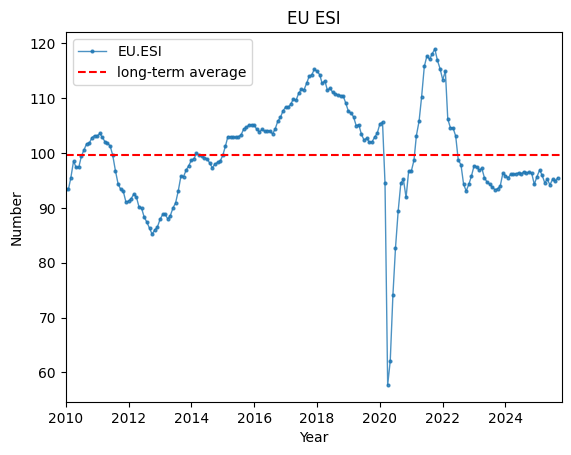

In [10]:
region = 'EU'
indicator = 'ESI'
start_date = datetime(2010, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = euro.table
df = df[['Year', 'Month', f'{region}.{indicator}']].dropna()
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
series = df[f'{region}.{indicator}']

fig, ax = plt.subplots()
ax.plot(dates, series, label=f'{region}.{indicator}', **line_settings)
ax.hlines(series.mean(), start_date, end_date, label='long-term average', colors='r', linestyles='dashed')

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title(f'{region} {indicator}')
ax.legend()

plt.show()

## 5. Caixin Manufacturing and Services PMI

The Caixin PMI (Purchasing Managers' Index) is a monthly indicator of the economic health of China's [manufacturing](https://tradingeconomics.com/china/manufacturing-pmi) and [services](https://tradingeconomics.com/china/services-pmi) sectors, specifically focusing on the private sector. Readings above 50 indicate expansion, while those below 50 suggest contraction. The Caixin PMI is closely watched by policymakers and traders as it provides early insights into the performance of Chinese businesses. 

#### Getting Data from the Caixin Manufacturing and Services PMI

In [11]:
caixin = CaixinPmi.download()
MarkDownDisplay("Caixin PMI", bold=True, align='center')
MarkDownDisplay(caixin.table, bold=True, align='center')

<p style="text-align: center";><b>Caixin PMI</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Manufacturing PMI</b></th>
      <th><b>Services PMI</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>49.5</td>
      <td>52.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>8</td>
      <td>50.5</td>
      <td>53.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>9</td>
      <td>51.2</td>
      <td>52.9</td>
    </tr>
  </tbody>
</table></div>

## 6. Market Data Snapshot from Trading Economics

[Trading Economics](https://tradingeconomics.com/commodities) provides a wealth of data related to the global economy in powerful formats. The classes and functions used below are written for the convenience of carrying out custom computations/visualizations with the data.

#### Getting Market Data from Trading Economics

The TradingEconomics class has five subclasses: commodities, stock indices, bonds, currencies, and crypto assets. Each of the subclasses have a few DataFrames as attributes which show different segments of data for that asset class.<br><br>To instantiate each of these subclasses, the relevant download method from the parent class (TradingEconomics) is used.

In [12]:
commodities = TradingEconomics.download_commodities() # other methods include download_stocks(), download_bonds(), download_currencies(), download_crypto()

<br> After instantiation of a subclass, the various tables (DataFrames) can be accessed using dot notation as shown below.

In [13]:
energy_table = commodities.energy
energy_table = energy_table.set_index(energy_table.columns[0])
MarkDownDisplay("Commodities - Energy", bold=True, align='center')
MarkDownDisplay(energy_table, index=True, bold=True, align='center')

metals_table = commodities.metals
metals_table = metals_table.set_index(metals_table.columns[0])
MarkDownDisplay("Commodities - Metals", bold=True, align='center')
MarkDownDisplay(metals_table, index=True, bold=True, align='center')

# Use .table to get all attribute DataFrames combined into one, e.g., commodities.table

<p style="text-align: center";><b>Commodities - Energy</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Unit</b></th>
      <th><b>Price</b></th>
      <th><b>Day %</b></th>
      <th><b>Weekly %</b></th>
      <th><b>Monthly %</b></th>
      <th><b>YTD %</b></th>
      <th><b>YoY %</b></th>
      <th><b>Date</b></th>
    </tr>
    <tr>
      <th><b>Energy</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Crude Oil</b></th>
      <td>USD/Bbl</td>
      <td>58.8</td>
      <td>0.91</td>
      <td>-4.41</td>
      <td>-7.69</td>
      <td>-18.02</td>
      <td>-16.11</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Brent</b></th>
      <td>USD/Bbl</td>
      <td>62.357</td>
      <td>0.72</td>
      <td>-4.39</td>
      <td>-8.23</td>
      <td>-16.46</td>
      <td>-16.24</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Natural gas</b></th>
      <td>USD/MMBtu</td>
      <td>3.0301</td>
      <td>0.47</td>
      <td>-7.31</td>
      <td>-2.25</td>
      <td>-16.6</td>
      <td>29.11</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Gasoline</b></th>
      <td>USD/Gal</td>
      <td>1.8427</td>
      <td>0.23</td>
      <td>-1.89</td>
      <td>-9.02</td>
      <td>-8.43</td>
      <td>-9.77</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Heating Oil</b></th>
      <td>USD/Gal</td>
      <td>2.2001</td>
      <td>1.16</td>
      <td>-3.52</td>
      <td>-6.57</td>
      <td>-5.05</td>
      <td>0.3</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Coal</b></th>
      <td>USD/T</td>
      <td>105.85</td>
      <td>1.98</td>
      <td>1.05</td>
      <td>4.03</td>
      <td>-15.49</td>
      <td>-28.19</td>
      <td>Oct/15</td>
    </tr>
    <tr>
      <th><b>TTF Gas</b></th>
      <td>EUR/MWh</td>
      <td>32.53</td>
      <td>2.2</td>
      <td>0.5</td>
      <td>0.38</td>
      <td>-35.53</td>
      <td>-17.79</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>UK Gas</b></th>
      <td>GBp/thm</td>
      <td>82.5003</td>
      <td>1.31</td>
      <td>-0.57</td>
      <td>3.75</td>
      <td>-34.2</td>
      <td>-16.19</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Ethanol</b></th>
      <td>USD/Gal</td>
      <td>1.64</td>
      <td>-4.09</td>
      <td>-7.87</td>
      <td>-18.2</td>
      <td>-2.96</td>
      <td>8.97</td>
      <td>Oct/15</td>
    </tr>
    <tr>
      <th><b>Naphtha</b></th>
      <td>USD/T</td>
      <td>518.34</td>
      <td>-0.57</td>
      <td>-4.94</td>
      <td>-9.12</td>
      <td>-15.23</td>
      <td>-20.13</td>
      <td>Oct/15</td>
    </tr>
    <tr>
      <th><b>Uranium</b></th>
      <td>USD/Lbs</td>
      <td>79.9</td>
      <td>0.5</td>
      <td>1.27</td>
      <td>4.72</td>
      <td>9.45</td>
      <td>-3.91</td>
      <td>Oct/15</td>
    </tr>
    <tr>
      <th><b>Propane</b></th>
      <td>USD/Gal</td>
      <td>0.65</td>
      <td>0.6</td>
      <td>-2.85</td>
      <td>-9.36</td>
      <td>-16.34</td>
      <td>-9.85</td>
      <td>Oct/15</td>
    </tr>
    <tr>
      <th><b>Methanol</b></th>
      <td>CNY/T</td>
      <td>2250.0</td>
      <td>-1.23</td>
      <td>2.88</td>
      <td>-1.7</td>
      <td>-18.68</td>
      <td>-7.79</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Coking Coal</b></th>
      <td>CNY/T</td>
      <td>192.5</td>
      <td>-0.52</td>
      <td>0.26</td>
      <td>-1.79</td>
      <td>-4.7</td>
      <td>-9.2</td>
      <td>Oct/15</td>
    </tr>
    <tr>
      <th><b>German Gas</b></th>
      <td>EUR/MWh</td>
      <td>32.81</td>
      <td>0.08</td>
      <td>-2.38</td>
      <td>-3.43</td>
      <td>-34.2</td>
      <td>-18.06</td>
      <td>Oct/15</td>
    </tr>
    <tr>
      <th><b>Urals Oil</b></th>
      <td>USD/Bbl</td>
      <td>56.48</td>
      <td>-0.18</td>
      <td>-8.79</td>
      <td>-10.8</td>
      <td>-17.56</td>
      <td>-15.47</td>
      <td>Oct/15</td>
    </tr>
  </tbody>
</table></div>

<p style="text-align: center";><b>Commodities - Metals</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Unit</b></th>
      <th><b>Price</b></th>
      <th><b>Day %</b></th>
      <th><b>Weekly %</b></th>
      <th><b>Monthly %</b></th>
      <th><b>YTD %</b></th>
      <th><b>YoY %</b></th>
      <th><b>Date</b></th>
    </tr>
    <tr>
      <th><b>Metals</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Gold</b></th>
      <td>USD/t.oz</td>
      <td>4244.32</td>
      <td>0.85</td>
      <td>6.77</td>
      <td>15.97</td>
      <td>61.73</td>
      <td>57.56</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Silver</b></th>
      <td>USD/t.oz</td>
      <td>53.133</td>
      <td>0.06</td>
      <td>7.71</td>
      <td>27.48</td>
      <td>83.98</td>
      <td>67.19</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Copper</b></th>
      <td>USD/Lbs</td>
      <td>4.9268</td>
      <td>0.07</td>
      <td>-3.64</td>
      <td>7.89</td>
      <td>23.79</td>
      <td>14.55</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Steel</b></th>
      <td>CNY/T</td>
      <td>3033.0</td>
      <td>0.97</td>
      <td>-2.0</td>
      <td>-2.0</td>
      <td>-8.37</td>
      <td>-6.3</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Lithium</b></th>
      <td>CNY/T</td>
      <td>73000.0</td>
      <td>0.0</td>
      <td>-0.75</td>
      <td>-0.21</td>
      <td>-2.73</td>
      <td>0.69</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Iron Ore CNY</b></th>
      <td>CNY/T</td>
      <td>773.5</td>
      <td>0.45</td>
      <td>-3.07</td>
      <td>-3.91</td>
      <td>-0.71</td>
      <td>2.59</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Platinum</b></th>
      <td>USD/t.oz</td>
      <td>1680.3</td>
      <td>0.65</td>
      <td>2.08</td>
      <td>22.5</td>
      <td>87.95</td>
      <td>68.86</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>HRC Steel</b></th>
      <td>USD/T</td>
      <td>805.08</td>
      <td>-0.97</td>
      <td>-0.97</td>
      <td>-0.97</td>
      <td>13.55</td>
      <td>14.2</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Iron Ore</b></th>
      <td>USD/T</td>
      <td>105.55</td>
      <td>0.29</td>
      <td>1.21</td>
      <td>0.12</td>
      <td>1.87</td>
      <td>-0.61</td>
      <td>Oct/15</td>
    </tr>
    <tr>
      <th><b>Silicon</b></th>
      <td>CNY/T</td>
      <td>8605.0</td>
      <td>0.41</td>
      <td>-0.41</td>
      <td>-3.8</td>
      <td>-23.85</td>
      <td>-33.5</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <th><b>Scrap Steel</b></th>
      <td>USD/T</td>
      <td>350.0</td>
      <td>0.0</td>
      <td>0.43</td>
      <td>3.55</td>
      <td>&lt;NA&gt;</td>
      <td>-2.64</td>
      <td>Oct/15</td>
    </tr>
    <tr>
      <th><b>Titanium</b></th>
      <td>CNY/KG</td>
      <td>48.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>-2.04</td>
      <td>7.87</td>
      <td>9.09</td>
      <td>Oct/16</td>
    </tr>
  </tbody>
</table></div>

<br> In future, a method may be built into the TradingEconomics class to allow preset plots to be generated. Below is a visualization of the YoY % price changes across various commodities:

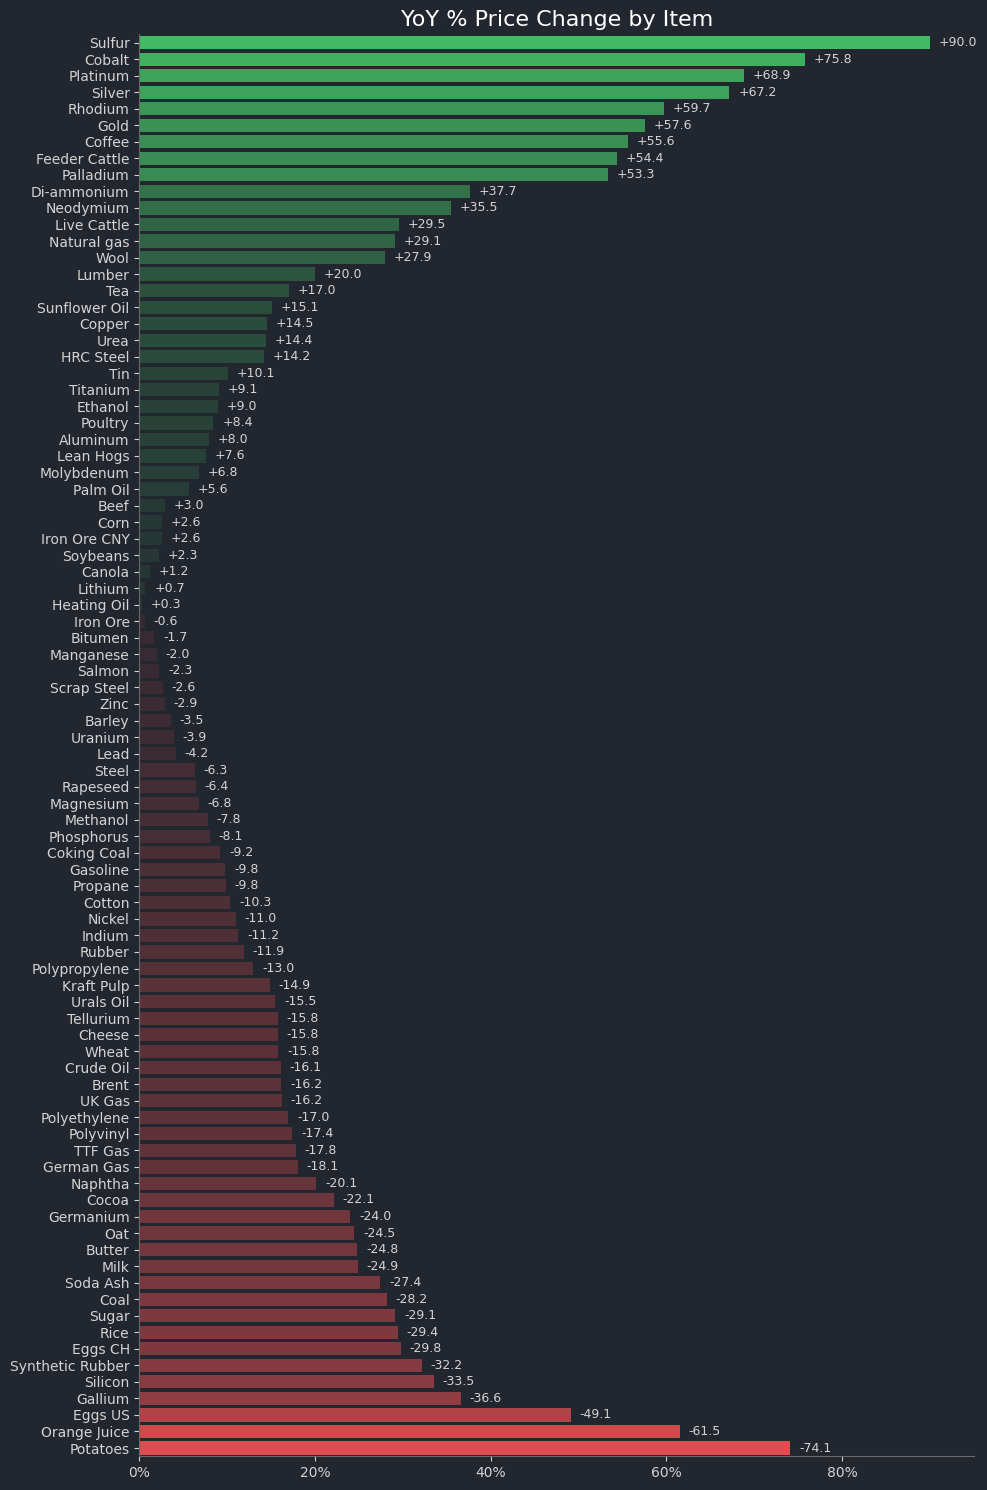

In [14]:
# Prepare x and y data
df = TradingEconomics.download_commodities().table
df = df[['Item', 'YoY %']][(df['Category'] != 'Index') & (df['Category'] != 'Electricity')]
df_sorted = df.sort_values(by='YoY %', ascending=False, ignore_index=True)
x = df_sorted['YoY %']
y = df_sorted['Item']

# Define colors
background_color = '#22262F'
pos_bar_color = '#30CC5A'
neg_bar_color = '#F63538'
title_color = 'white'
axes_label_color = 'lightgray'
tick_color = 'lightgray'
spine_color = 'dimgray'
data_label_color = 'lightgray'

# Create figure
bar_colors = ['r' if x < 0 else 'g' for x in x]
color_palette = {'r': neg_bar_color, 'g': pos_bar_color}
x = abs(x)

fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x=x, y=y, hue=bar_colors, palette=color_palette, legend=False)
ax.set_title('YoY % Price Change by Item', fontsize=16, color=title_color)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%"))
ax.set_xlabel('')
ax.set_ylabel('')

# Add data labels
labels = [f'+{x:.1f}' if x > 0 else f'{x:.1f}' for x in df_sorted['YoY %']]
labels_idx_offset = 0
for container in ax.containers:  
    for i, bar in enumerate(container):
        x_val = bar.get_width()
        y_val = bar.get_y() + bar.get_height() / 2
        label = labels[i + labels_idx_offset]
        ax.text(x_val + 1, y_val, label, va='center', ha='left', fontsize=9, color=data_label_color)
    labels_idx_offset += len(container)

# Customize figure
ax.set_xlim(0, max(x) + 5)

fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.tick_params(axis='x', colors=tick_color)
ax.tick_params(axis='y', colors=tick_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)

# Control transparency of bars based on change magnitude; less change = less solid
x = df_sorted['YoY %']
x_pos = x[x >= 0]
x_neg = abs(x[x < 0])
norm_alpha_pos = colors.Normalize(vmin=x_pos.min(), vmax=0.9*x_pos.max(), clip=True)
norm_alpha_neg = colors.Normalize(vmin=x_neg.min(), vmax=0.9*x_neg.max(), clip=True)
min_alpha, max_alpha = 0.1, 1
bar_alphas = [
    min_alpha + (max_alpha - min_alpha) * norm_alpha_neg(abs(val)) if val < 0 else
    min_alpha + (max_alpha - min_alpha) * norm_alpha_pos(abs(val)) for val in x]
[bar.set_alpha(alpha) for alpha, bar in zip(bar_alphas, ax.patches)]

# Show plot
plt.tight_layout()
plt.show()

## 7. Industry and Stock-Level Data from FinViz

[Finviz](https://finviz.com/) offers a wealth of stock market data and a powerful screener. The idea is not to replicate the screener, but to quickly and conveniently retrieve data for custom computations/visualizations.

#### Getting Industry-Level and Stock-Level Data from Finviz

In [15]:
industries = Finviz.download_industries()

industry_table = industries.table
industry_table = industry_table.set_index(industry_table.columns[0]) 
MarkDownDisplay(industry_table.head(), index=True, bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Market Cap (m USD)</b></th>
      <th><b>P/E</b></th>
      <th><b>Fwd P/E</b></th>
      <th><b>PEG</b></th>
      <th><b>P/S</b></th>
      <th><b>P/B</b></th>
      <th><b>P/C</b></th>
      <th><b>P/FCF</b></th>
      <th><b>Dividend (%)</b></th>
      <th><b>EPS past 5Y (%)</b></th>
      <th><b>EPS next 5Y (%)</b></th>
      <th><b>Sales past 5Y (%)</b></th>
      <th><b>Float Short (%)</b></th>
      <th><b>Perf Week (%)</b></th>
      <th><b>Perf Month (%)</b></th>
      <th><b>Perf Quart (%)</b></th>
      <th><b>Perf Half (%)</b></th>
      <th><b>Perf Year (%)</b></th>
      <th><b>Perf YTD (%)</b></th>
      <th><b>Recom</b></th>
      <th><b>Avg Volume (m USD)</b></th>
      <th><b>Rel Volume</b></th>
      <th><b>Change (%)</b></th>
      <th><b>Volume (m USD)</b></th>
      <th><b>Stocks</b></th>
    </tr>
    <tr>
      <th><b>Industry</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Advertising Agencies</b></th>
      <td>272400.0</td>
      <td>53.16</td>
      <td>27.02</td>
      <td>1.15</td>
      <td>3.93</td>
      <td>11.25</td>
      <td>21.91</td>
      <td>31.89</td>
      <td>0.63</td>
      <td>67.36</td>
      <td>46.33</td>
      <td>30.8</td>
      <td>7.35</td>
      <td>-4.0</td>
      <td>0.63</td>
      <td>31.98</td>
      <td>78.85</td>
      <td>62.02</td>
      <td>21.79</td>
      <td>1.76</td>
      <td>64.78</td>
      <td>0.57</td>
      <td>1.81</td>
      <td>37.04</td>
      <td>41</td>
    </tr>
    <tr>
      <th><b>Aerospace &amp; Defense</b></th>
      <td>1607380.0</td>
      <td>44.64</td>
      <td>32.55</td>
      <td>2.87</td>
      <td>3.19</td>
      <td>7.42</td>
      <td>24.97</td>
      <td>54.29</td>
      <td>0.91</td>
      <td>20.9</td>
      <td>15.56</td>
      <td>3.94</td>
      <td>5.1</td>
      <td>-3.53</td>
      <td>2.45</td>
      <td>5.22</td>
      <td>33.29</td>
      <td>32.01</td>
      <td>38.21</td>
      <td>1.83</td>
      <td>195.99</td>
      <td>1.32</td>
      <td>-1.53</td>
      <td>258.32</td>
      <td>76</td>
    </tr>
    <tr>
      <th><b>Agricultural Inputs</b></th>
      <td>101170.0</td>
      <td>22.02</td>
      <td>14.15</td>
      <td>1.93</td>
      <td>1.5</td>
      <td>1.49</td>
      <td>14.38</td>
      <td>14.45</td>
      <td>2.58</td>
      <td>3.2</td>
      <td>11.39</td>
      <td>4.44</td>
      <td>1.83</td>
      <td>-3.02</td>
      <td>-5.3</td>
      <td>-10.43</td>
      <td>5.93</td>
      <td>4.77</td>
      <td>9.3</td>
      <td>2.09</td>
      <td>15.38</td>
      <td>3.72</td>
      <td>-1.02</td>
      <td>57.26</td>
      <td>15</td>
    </tr>
    <tr>
      <th><b>Airlines</b></th>
      <td>165840.0</td>
      <td>12.44</td>
      <td>9.48</td>
      <td>0.67</td>
      <td>0.61</td>
      <td>2.63</td>
      <td>3.36</td>
      <td>13.42</td>
      <td>1.2</td>
      <td>-5.6</td>
      <td>18.49</td>
      <td>6.19</td>
      <td>6.63</td>
      <td>3.81</td>
      <td>1.9</td>
      <td>5.42</td>
      <td>40.95</td>
      <td>30.49</td>
      <td>7.23</td>
      <td>1.7</td>
      <td>134.26</td>
      <td>0.86</td>
      <td>0.44</td>
      <td>115.42</td>
      <td>17</td>
    </tr>
    <tr>
      <th><b>Airports &amp; Air Services</b></th>
      <td>43060.0</td>
      <td>31.72</td>
      <td>21.29</td>
      <td>2.55</td>
      <td>5.48</td>
      <td>7.23</td>
      <td>12.1</td>
      <td>33.76</td>
      <td>3.97</td>
      <td>18.26</td>
      <td>12.45</td>
      <td>13.36</td>
      <td>6.82</td>
      <td>-1.22</td>
      <td>1.0</td>
      <td>-2.1</td>
      <td>51.35</td>
      <td>51.81</td>
      <td>44.74</td>
      <td>2.79</td>
      <td>52.91</td>
      <td>1.14</td>
      <td>-0.88</td>
      <td>60.36</td>
      <td>9</td>
    </tr>
  </tbody>
</table></div>

In [16]:
stocks = Finviz.download_stocks(num_rows=10) # if num_rows is not specified, all rows are returned.

stocks_table = stocks.table
stocks_table = stocks_table.set_index(stocks_table.columns[0])
MarkDownDisplay(stocks_table.head(), index=True, bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Company</b></th>
      <th><b>Index</b></th>
      <th><b>Sector</b></th>
      <th><b>Industry</b></th>
      <th><b>Country</b></th>
      <th><b>Exchange</b></th>
      <th><b>Market Cap (m USD)</b></th>
      <th><b>P/E</b></th>
      <th><b>Fwd P/E</b></th>
      <th><b>PEG</b></th>
      <th><b>P/S</b></th>
      <th><b>P/B</b></th>
      <th><b>P/C</b></th>
      <th><b>P/FCF</b></th>
      <th><b>Book/sh</b></th>
      <th><b>Cash/sh</b></th>
      <th><b>Dividend</b></th>
      <th><b>Dividend (%)</b></th>
      <th><b>Dividend TTM</b></th>
      <th><b>Dividend Ex Date</b></th>
      <th><b>Payout Ratio (%)</b></th>
      <th><b>EPS</b></th>
      <th><b>EPS next Q</b></th>
      <th><b>EPS This Y (%)</b></th>
      <th><b>EPS Next Y (%)</b></th>
      <th><b>EPS Past 5Y (%)</b></th>
      <th><b>EPS Next 5Y (%)</b></th>
      <th><b>Sales Past 5Y (%)</b></th>
      <th><b>Sales Q/Q (%)</b></th>
      <th><b>EPS Q/Q (%)</b></th>
      <th><b>EPS YoY TTM (%)</b></th>
      <th><b>Sales YoY TTM (%)</b></th>
      <th><b>Sales (m USD)</b></th>
      <th><b>Income (m USD)</b></th>
      <th><b>EPS Surprise (%)</b></th>
      <th><b>Revenue Surprise (%)</b></th>
      <th><b>Outstanding (m USD)</b></th>
      <th><b>Float (m USD)</b></th>
      <th><b>Float %</b></th>
      <th><b>Insider Own (%)</b></th>
      <th><b>Insider Trans (%)</b></th>
      <th><b>Inst Own (%)</b></th>
      <th><b>Inst Trans (%)</b></th>
      <th><b>Short Float (%)</b></th>
      <th><b>Short Ratio</b></th>
      <th><b>Short Interest (m USD)</b></th>
      <th><b>ROA (%)</b></th>
      <th><b>ROE (%)</b></th>
      <th><b>ROIC (%)</b></th>
      <th><b>Curr R</b></th>
      <th><b>Quick R</b></th>
      <th><b>LTDebt/Eq</b></th>
      <th><b>Debt/Eq</b></th>
      <th><b>Gross M (%)</b></th>
      <th><b>Oper M (%)</b></th>
      <th><b>Profit M (%)</b></th>
      <th><b>Perf Week (%)</b></th>
      <th><b>Perf Month (%)</b></th>
      <th><b>Perf Quart (%)</b></th>
      <th><b>Perf Half (%)</b></th>
      <th><b>Perf Year (%)</b></th>
      <th><b>Perf YTD (%)</b></th>
      <th><b>Beta</b></th>
      <th><b>ATR</b></th>
      <th><b>Volatility W (%)</b></th>
      <th><b>Volatility M (%)</b></th>
      <th><b>SMA20 (%)</b></th>
      <th><b>SMA50 (%)</b></th>
      <th><b>SMA200 (%)</b></th>
      <th><b>50D High (%)</b></th>
      <th><b>50D Low (%)</b></th>
      <th><b>52W High (%)</b></th>
      <th><b>52W Low (%)</b></th>
      <th><b>52W Range</b></th>
      <th><b>All-Time High (%)</b></th>
      <th><b>All-Time Low (%)</b></th>
      <th><b>RSI</b></th>
      <th><b>Earnings</b></th>
      <th><b>IPO Date</b></th>
      <th><b>Optionable</b></th>
      <th><b>Shortable</b></th>
      <th><b>Employees</b></th>
      <th><b>Change from Open (%)</b></th>
      <th><b>Gap (%)</b></th>
      <th><b>Recom</b></th>
      <th><b>Avg Volume (m USD)</b></th>
      <th><b>Rel Volume</b></th>
      <th><b>Volume</b></th>
      <th><b>Target Price</b></th>
      <th><b>Prev Close</b></th>
      <th><b>Open</b></th>
      <th><b>High</b></th>
      <th><b>Low</b></th>
      <th><b>Price</b></th>
      <th><b>Change (%)</b></th>
    </tr>
    <tr>
      <th><b>Ticker</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>A</b></th>
      <td>Agilent Technologies Inc</td>
      <td>S&amp;P 500</td>
      <td>Healthcare</td>
      <td>Diagnostics &amp; Research</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>39590.0</td>
      <td>32.75</td>
      <td>23.21</td>
      <td>4.16</td>
      <td>5.83</td>
      <td>6.22</td>
      <td>25.79</td>
      <td>36.39</td>
      <td>22.46</td>
      <td>5.41</td>
      <td>0.98</td>
      <td>0.7</td>
      <td>0.99</td>
      <td>30/09/2025</td>
      <td>21.31</td>
      <td>4.26</td>
      <td>1.58</td>
      <td>5.35</td>
      <td>7.95</td>
      <td>5.63</td>
      <td>7.87</td>
      <td>4.75</td>
      <td>10.14</td>
      <td>21.66</td>
      <td>-11.52</td>
      <td>4.48</td>
      <td>6790.0</td>
      <td>1220.0</td>
      <td>0.12</td>
      <td>3.17</td>
      <td>283.59</td>
      <td>282.22</td>
      <td>99.52</td>
      <td>0.45</td>
      <td>-0.43</td>
      <td>91.66</td>
      <td>0.89</td>
      <td>1.11</td>
      <td>1.88</td>
      <td>3.14</td>
      <td>10.51</td>
      <td>19.88</td>
      <td>12.55</td>
      <td>2.25</td>
      <td>1.71</td>
      <td>0.53</td>
      <td>0.54</td>
      <td>52.98</td>
      <td>22.91</td>
      <td>17.97</td>
      <td>-0.82</td>
      <td>9.8</td>
      <td>20.02</td>
      <td>35.42</td>
      <td>-2.9</td>
      <td>3.95</td>
      <td>1.27</td>
      <td>3.44</td>
      <td>2.5</td>
      <td>2.55</td>
      <td>4.98</td>
      <td>10.64</td>
      <td>13.43</td>
      <td>-2.4</td>
      <td>24.07</td>
      <td>-9.22</td>
      <td>44.82</td>
      <td>96.43 - 153.84</td>
      <td>-22.23</td>
      <td>1873.97</td>
      <td>64.12</td>
      <td>27/08/2025</td>
      <td>18/11/1999</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>17900</td>
      <td>0.7</td>
      <td>0.46</td>
      <td>2.05</td>
      <td>1.67</td>
      <td>0.91</td>
      <td>1692458</td>
      <td>149.64</td>
      <td>138.04</td>
      <td>138.68</td>
      <td>140.22</td>
      <td>137.35</td>
      <td>139.65</td>
      <td>1.17</td>
    </tr>
    <tr>
      <th><b>AA</b></th>
      <td>Alcoa Corp</td>
      <td>-</td>
      <td>Basic Materials</td>
      <td>Aluminum</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>9440.0</td>
      <td>9.35</td>
      <td>10.99</td>
      <td>0.22</td>
      <td>0.72</td>
      <td>1.54</td>
      <td>5.64</td>
      <td>16.22</td>
      <td>23.7</td>
      <td>6.47</td>
      <td>0.4</td>
      <td>1.1</td>
      <td>0.4</td>
      <td>12/08/2025</td>
      <td>142.65</td>
      <td>3.9</td>
      <td>0.01</td>
      <td>137.03</td>
      <td>3.7</td>
      <td>&lt;NA&gt;</td>
      <td>43.31</td>
      <td>3.03</td>
      <td>3.85</td>
      <td>470.86</td>
      <td>227.19</td>
      <td>21.32</td>
      <td>13020.0</td>
      <td>1000.0</td>
      <td>20.97</td>
      <td>3.8</td>
      <td>258.91</td>
      <td>257.81</td>
      <td>99.58</td>
      <td>0.43</td>
      <td>0.0</td>
      <td>78.16</td>
      <td>1.51</td>
      <td>3.55</td>
      <td>1.47</td>
      <td>9.15</td>
      <td>6.85</td>
      <td>20.01</td>
      <td>11.53</td>
      <td>1.65</td>
      <td>0.97</td>
      <td>0.42</td>
      <td>0.43</td>
      <td>18.81</td>
      <td>16.07</td>
      <td>7.71</td>
      <td>-1.62</td>
      <td>8.9</td>
      <td>24.06</td>
      <td>47.73</td>
      <td>-11.12</td>
      <td>-3.49</td>
      <td>2.24</td>
      <td>1.41</td>
      <td>4.09</td>
      <td>3.82</td>
      <td>7.0</td>
      <td>12.47</td>
      <td>16.34</td>
      <td>-4.28</td>
      <td>26.44</td>
      <td>-23.68</td>
      <td>69.35</td>
      <td>21.53 - 47.77</td>
      <td>-62.83</td>
      <td>606.59</td>
      <td>61.44</td>
      <td>22/10/2025</td>
      <td>18/10/2016</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>13900</td>
      <td>0.44</td>
      <td>1.54</td>
      <td>2.06</td>
      <td>6.25</td>
      <td>0.85</td>
      <td>5311014</td>
      <td>39.1</td>
      <td>35.75</td>
      <td>36.3</td>
      <td>36.66</td>
      <td>35.62</td>
      <td>36.46</td>
      <td>1.99</td>
    </tr>
    <tr>
      <th><b>AACB</b></th>
      <td>Artius II Acquisition Inc</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NASD</td>
      <td>297.91</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.34</td>
      <td>1241.3</td>
      <td>&lt;NA&gt;</td>
      <td>7.63</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>29.15</td>
      <td>23.48</td>
      <td>80.55</td>
      <td>19.47</td>
      <td>0.0</td>
      <td>65.23</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.08</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>2.92</td>
      <td>2.92</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.39</td>
      <td>0.99</td>
      <td>1.69</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>3.44</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.4</td>
      <td>0.11</td>
      <td>0.66</td>
      <td>0.83</td>
      <td>1.47</td>
      <td>0.29</td>
      <td>1.29</td>
      <td>0.29</td>
      <td>3.76</td>
      <td>9.85 - 10.19</td>
      <td>-0.1</td>
      <td>3.76</td>
      <td>66.97</td>
      <td>&amp;nbsp;</td>
      <td>07/04/2025</td>
      <td>No</td>
      <td>Yes</td>
      <td>1</td>
      <td>0.1</td>
      <td>0.2</td>
      <td>&lt;NA&gt;</td>
      <td>0.07007</td>
      <td>0.07</td>
      <td>4853</td>
      <td>&lt;NA&gt;</td>
      <td>10.19</td>
      <td>10.21</td>
      <td>10.23</td>
      <td>10.21</td>
      <td>10.22</td>
      <td>0.29</td>
    </tr>
    <tr>
      <th><b>AACG</b></th>
      <td>ATA Creativity Global ADR</td>
      <td>-</td>
      <td>Consumer Defensive</td>
      <td>Education &amp; Training Services</td>
      <td>China</td>
      <td>NASD</td>
      <td>36.7</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.95</td>
      <td>4.71</td>
      <td>7.58</td>
      <td>&lt;NA&gt;</td>
      <td>0.24</td>
      <td>0.15</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>27/08/2018</td>
      <td>&lt;NA&gt;</td>
      <td>-0.11</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>26.78</td>
      <td>&lt;NA&gt;</td>
      <td>21.36</td>
      <td>8.11</td>
      <td>35.5</td>
      <td>24.98</td>
      <td>15.48</td>
      <td>38.81</td>
      <td>-3.52</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>31.91</td>
      <td>8.84</td>
      <td>27.7</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.51</td>
      <td>-0.14</td>
      <td>0.72</td>
      <td>0.24</td>
      <td>0.06</td>
      <td>-5.59</td>
      <td>-37.39</td>
      <td>-36.0</td>
      <td>0.19</td>
      <td>0.19</td>
      <td>0.26</td>
      <td>0.82</td>
      <td>52.67</td>
      <td>-11.16</td>
      <td>-9.08</td>
      <td>-13.86</td>
      <td>-54.9</td>
      <td>38.55</td>
      <td>22.34</td>
      <td>22.29</td>
      <td>35.93</td>
      <td>0.99</td>
      <td>0.18</td>
      <td>12.0</td>
      <td>12.86</td>
      <td>-27.97</td>
      <td>-37.39</td>
      <td>-0.39</td>
      <td>-55.42</td>
      <td>8.49</td>
      <td>-55.42</td>
      <td>64.29</td>
      <td>0.70 - 2.58</td>
      <td>-94.18</td>
      <td>430.04</td>
      <td>28.87</td>
      <td>&amp;nbsp;</td>
      <td>29/01/2008</td>
      <td>No</td>
      <td>Yes</td>
      <td>599</td>
      <td>-1.71</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.26665</td>
      <td>0.26</td>
      <td>69227</td>
      <td>6.5</td>
      <td>1.17</td>
      <td>1.17</td>
      <td>1.25</td>
      <td>1.14</td>
      <td>1.15</td>
      <td>-1.71</td>
    </tr>
    <tr>
      <th><b>AACI</b></th>
      <td>Armada Acquisition Corp. II</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NASD</td>
      <td>331.06</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>689.71</td>
      <td>&lt;NA&gt;</td>
      <td>-0.27</td>
      <td>0.02</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>23.71</td>
      <td>23.71</td>
      <td>100.0</td>
      <td>24.94</td>
      <td>0.0</td>
      <td>45.74</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.03</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.66</td>
      <td>4.66</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.67</td>
      <td>1.95</td>
      <td>4.49</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.38</td>
      <td>&lt;NA&gt;</td>
      <td>0.11</td>
      <td>1.18</td>
      <td>0.91</td>
      <td>0.57</td>
      <td>1.65</td>
      <td>2.51</td>
      <td>-3.91</td>
      <td>4.49</td>
      <td>-3.91</td>
      <td>4.8</td>
      <td>10.00 - 10.91</td>
      <td>-3.91</td>
      <td>4.8</td>
      <td>60.89</td>
      <td>&amp;nbsp;</td>
      <td>24/06/2025</td>
      <td>No</td>
      <td>Yes</td>
      <td>&lt;NA&gt;</td>
      <td>-3.85</td>
      <td>3.81</td>
      <td>&lt;NA&gt;</td>
      <td>0.14323</td>
      <td>1.23</td>
      <td>177856</td>
      <td>&lt;NA&gt;</td>
      <td>10.5</td>
      <td>10.9</td>
      <td>10.9</td>
      <td>10.43</td>
      <td>10.48</td>
      <td>-0.19</td>
    </tr>
  </tbody>
</table></div>

<br>The description of a particular stock may be obtained as follows:

In [17]:
desc = FinvizScreener.stock_description(['AAPL', 'GOOGL', 'MSFT'])
MarkDownDisplay(desc['AAPL'], block=True)

><p style="text-align: left";>Apple, Inc. engages in the design, manufacture, and sale of smartphones, personal computers, tablets, wearables and accessories, and other varieties of related services. It operates through the following geographical segments: Americas, Europe, Greater China, Japan, and Rest of Asia Pacific. The Americas segment includes North and South America. The Europe segment consists of European countries, as well as India, the Middle East, and Africa. The Greater China segment comprises China, Hong Kong, and Taiwan. The Rest of Asia Pacific segment includes Australia and Asian countries. Its products and services include iPhone, Mac, iPad, AirPods, Apple TV, Apple Watch, Beats products, AppleCare, iCloud, digital content stores, streaming, and licensing services. The company was founded by Steven Paul Jobs, Ronald Gerald Wayne, and Stephen G. Wozniak in April 1976 and is headquartered in Cupertino, CA.</p>

## 8. Loading Extracted Data into SQLite Database

The extracted data is stored in a light-weight SQLite database using the DBConnection class and its methods, in utility.py, written in SQLAlchemy. Each scraper class has methods to prepare the data in the format/structure that reflects the target database tables.

In [18]:
ism_man.load()
ism_serv.load()
consumer.load()
build.load()
euro.load()
caixin.load()
commodities.load()

Successful upsert in US_Man_Pmi_Report.
Successful upsert in US_Man_Industry_Ranking.
Successful upsert in US_Ser_Pmi_Report.
Successful upsert in US_Ser_Industry_Ranking.
Successful upsert in US_Consumers.
Successful upsert in US_Buildings.
Successful upsert in EU_Economic_Sentiment.
Successful upsert in Caixin_PMI.
Successful upsert in Commodities.


Data from the database tables may be obtained using the df_from_sql method in the DBConnection class (examples below).

In [19]:
consumers = DBConnection().df_from_sql('US_Consumers')
indices = DBConnection().df_from_sql('Stock_Indices')

MarkDownDisplay(consumers.tail(6), bold=True, align='center')
MarkDownDisplay(indices.head(10), bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>year</b></th>
      <th><b>month</b></th>
      <th><b>consumer_sentiment_index</b></th>
      <th><b>current_conditions_index</b></th>
      <th><b>expectations_index</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>52.2</td>
      <td>58.9</td>
      <td>47.9</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>60.7</td>
      <td>64.8</td>
      <td>58.1</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>61.7</td>
      <td>68.0</td>
      <td>57.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>8</td>
      <td>58.2</td>
      <td>61.7</td>
      <td>55.9</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>9</td>
      <td>55.1</td>
      <td>60.4</td>
      <td>51.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>10</td>
      <td>55.0</td>
      <td>61.0</td>
      <td>51.2</td>
    </tr>
  </tbody>
</table></div>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>item</b></th>
      <th><b>category</b></th>
      <th><b>price</b></th>
      <th><b>day_pct</b></th>
      <th><b>weekly_pct</b></th>
      <th><b>monthly_pct</b></th>
      <th><b>ytd_pct</b></th>
      <th><b>yoy_pct</b></th>
      <th><b>date</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>US500</td>
      <td>Major</td>
      <td>6705.67</td>
      <td>0.52</td>
      <td>-0.44</td>
      <td>1.60</td>
      <td>14.01</td>
      <td>14.79</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <td>US30</td>
      <td>Major</td>
      <td>46398.00</td>
      <td>0.31</td>
      <td>0.08</td>
      <td>0.82</td>
      <td>9.06</td>
      <td>7.30</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <td>US100</td>
      <td>Major</td>
      <td>24909.00</td>
      <td>0.66</td>
      <td>-0.76</td>
      <td>2.83</td>
      <td>18.54</td>
      <td>23.37</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <td>JP225</td>
      <td>Major</td>
      <td>48412.00</td>
      <td>1.55</td>
      <td>-0.35</td>
      <td>8.09</td>
      <td>21.35</td>
      <td>24.42</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <td>GB100</td>
      <td>Major</td>
      <td>9410.00</td>
      <td>-0.16</td>
      <td>-1.04</td>
      <td>2.19</td>
      <td>15.14</td>
      <td>12.22</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <td>DE40</td>
      <td>Major</td>
      <td>24203.00</td>
      <td>0.09</td>
      <td>-1.66</td>
      <td>3.61</td>
      <td>21.57</td>
      <td>23.59</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <td>FR40</td>
      <td>Major</td>
      <td>8140.00</td>
      <td>0.78</td>
      <td>1.23</td>
      <td>4.54</td>
      <td>10.29</td>
      <td>7.34</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <td>IT40</td>
      <td>Major</td>
      <td>42099.00</td>
      <td>0.46</td>
      <td>-1.62</td>
      <td>0.34</td>
      <td>23.15</td>
      <td>20.15</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <td>ES35</td>
      <td>Major</td>
      <td>15579.00</td>
      <td>0.06</td>
      <td>-0.04</td>
      <td>2.99</td>
      <td>34.36</td>
      <td>30.87</td>
      <td>Oct/16</td>
    </tr>
    <tr>
      <td>ASX200</td>
      <td>Major</td>
      <td>9079.00</td>
      <td>0.98</td>
      <td>1.22</td>
      <td>2.96</td>
      <td>11.28</td>
      <td>8.66</td>
      <td>Oct/16</td>
    </tr>
  </tbody>
</table></div>